In [2]:
import pandas as pd
pd.set_option('display.max_columns',10)  
pd.set_option('display.max_rows',20)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
np.__version__

'1.20.3'

In [8]:
off_train = pd.read_csv('./data/ccf_offline_stage1_train.csv',
                        keep_default_na=False)
off_train.columns = [
    'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
    'date_received', 'date'
]

off_test = pd.read_csv('./data/ccf_offline_stage1_test_revised.csv',
                       keep_default_na=False)
off_test.columns = [
    'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
    'date_received'
]

on_train = pd.read_csv('./data/ccf_online_stage1_train.csv',
                       keep_default_na=False)
on_train.columns = [
    'user_id', 'merchant_id', 'action', 'coupon_id', 'discount_rate',
    'date_received', 'date'
]


off_train[['user_id', 'merchant_id',
           'coupon_id']] = off_train[['user_id', 'merchant_id',
                                      'coupon_id']].astype(str)
off_test[['user_id', 'merchant_id',
          'coupon_id']] = off_test[['user_id', 'merchant_id',
                                    'coupon_id']].astype(str)
on_train[['user_id', 'merchant_id',
          'coupon_id']] = on_train[['user_id', 'merchant_id',
                                    'coupon_id']].astype(str)

## 探索

In [15]:
#离线训练数据
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,null,null,0,null,20160217
1,1439408,4663,11002,150:20,1,20160528,null
2,1439408,2632,8591,20:1,0,20160217,null
3,1439408,2632,1078,20:1,0,20160319,null
4,1439408,2632,8591,20:1,0,20160613,null


In [16]:
#在线训练数据
on_train.head()

,user_id,merchant_id,action,coupon_id,discount_rate,date_received,date
0,13740231,18907,2,100017492,500:50,20160513,null
1,13740231,34805,1,null,null,null,20160321
2,14336199,18907,0,null,null,null,20160618
3,14336199,18907,0,null,null,null,20160618
4,14336199,18907,0,null,null,null,20160618


In [17]:
#测试数据
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1,20160712
1,6949378,1300,3429,30:5,null,20160706
2,2166529,7113,6928,200:20,5,20160727
3,2166529,7113,1808,100:10,5,20160727
4,6172162,7605,6500,30:1,2,20160708


In [18]:
#离线训练数据
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   merchant_id    object
 2   coupon_id      object
 3   discount_rate  object
 4   distance       object
 5   date_received  object
 6   date           object
dtypes: object(7)
memory usage: 93.7+ MB


In [19]:
#在线训练数据
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   merchant_id    object
 2   action         int64 
 3   coupon_id      object
 4   discount_rate  object
 5   date_received  object
 6   date           object
dtypes: int64(1), object(6)
memory usage: 610.4+ MB


In [20]:
#测试集
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        113640 non-null  object
 1   merchant_id    113640 non-null  object
 2   coupon_id      113640 non-null  object
 3   discount_rate  113640 non-null  object
 4   distance       113640 non-null  object
 5   date_received  113640 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 5.2+ MB


In [21]:
#离线训练数据
off_train.describe()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
count,1754884,1754884,1754884,1754884,1754884,1754884,1754884
unique,539438,8415,9739,46,12,168,183
top,5054119,3381,null,null,0,null,null
freq,264,142190,701602,701602,826070,701602,977900


### 数据日期范围

In [24]:
print('offline train date_received')
print(off_train[off_train['date_received'] != 'null']['date_received'].min())
print(off_train[off_train['date_received'] != 'null']['date_received'].max())

print('online train date_received')
print(on_train[on_train['date_received'] != 'null']['date_received'].min())
print(on_train[on_train['date_received'] != 'null']['date_received'].max())

print('test date_received')
print(off_test['date_received'].min())
print(off_test['date_received'].max())

offline train date_received
20160101
20160615
online train date_received
20160101
20160615
test date_received
20160701
20160731


In [25]:
print('offline train date')
print(off_train[off_train['date'] != 'null']['date'].min())
print(off_train[off_train['date'] != 'null']['date'].max())

print('online train date')
print(on_train[on_train['date'] != 'null']['date'].min())
print(on_train[on_train['date'] != 'null']['date'].max())

offline train date
20160101
20160630
online train date
20160101
20160630


用券数据是到6月30日，而领券日期并不是到6月30日，而是到6月15日

### 训练集与测试集的相关性

In [26]:
#查看online offline 训练集的 user_id与测试集的重合度
off_train_user = off_train[['user_id']].copy().drop_duplicates()
off_test_user = off_test[['user_id']].copy().drop_duplicates()
on_train_user = on_train[['user_id']].copy().drop_duplicates()

print('offline 训练集用户ID数量')
print(off_train_user.user_id.count())
print('online 训练集用户ID数量')
print(on_train_user.user_id.count())
print('offline 测试集用户ID数量')
print(off_test_user.user_id.count())


off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user, on='user_id',
                                how="left").reset_index().fillna(0)
print('offline 训练集用户与测试集用户重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集用户与测试集重复用户在总测试集用户中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())


on_train_user['on_train_flag'] = 1
on_merge = off_test_user.merge(on_train_user, on='user_id',
                               how="left").reset_index().fillna(0)
print('online 训练集用户与测试集用户重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集用户与测试集重复用户在总测试集用户中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集用户ID数量
539438
online 训练集用户ID数量
762858
offline 测试集用户ID数量
76309
offline 训练集用户与测试集用户重复数量
76307.0
offline 训练集用户与测试集重复用户在总测试集用户中的占比
0.9999737907717308
online 训练集用户与测试集用户重复数量
43155.0
online 训练集用户与测试集重复用户在总测试集用户中的占比
0.5655296229802513


In [27]:
#查看online offline 训练集的 merchant_id 与测试集的重合度
off_train_merchant = off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant = off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant = on_train[['merchant_id']].copy().drop_duplicates()

print('offline 训练集商家ID数量')
print(off_train_merchant.merchant_id.count())
print('online 训练集商家ID数量')
print(on_train_merchant.merchant_id.count())
print('offline 测试集商家ID数量')
print(off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag'] = 1
off_merge = off_test_merchant.merge(off_train_merchant,
                                    on='merchant_id',
                                    how="left").reset_index().fillna(0)
print('offline 训练集商家与测试集商家重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集商家与测试集重复商家在总测试集商家中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag'] = 1
on_merge = off_test_merchant.merge(on_train_merchant,
                                   on='merchant_id',
                                   how="left").reset_index().fillna(0)
print('online 训练集商家与测试集商家重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集商家与测试集重复商家在总测试集商家中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集商家ID数量
8415
online 训练集商家ID数量
7999
offline 测试集商家ID数量
1559
offline 训练集商家与测试集商家重复数量
1558.0
offline 训练集商家与测试集重复商家在总测试集商家中的占比
0.9993585631815266
online 训练集商家与测试集商家重复数量
0.0
online 训练集商家与测试集重复商家在总测试集商家中的占比
0.0


In [28]:
#查看online offline 训练集的 coupon_id 与测试集的重合度
off_train_coupon = off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon = off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon = on_train[['coupon_id']].copy().drop_duplicates()

print('offline 训练集优惠券ID数量')
print(off_train_coupon.coupon_id.count())
print('online 训练集优惠券ID数量')
print(on_train_coupon.coupon_id.count())
print('offline 测试集优惠券ID数量')
print(off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag'] = 1
off_merge = off_test_coupon.merge(off_train_coupon, on='coupon_id',
                                  how="left").reset_index().fillna(0)
print('offline 训练集优惠券与测试集优惠券重复数量')
print(off_merge['off_train_flag'].sum())
print('offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag'] = 1
on_merge = off_test_coupon.merge(on_train_coupon, on='coupon_id',
                                 how="left").reset_index().fillna(0)
print('online 训练集优惠券与测试集优惠券重复数量')
print(on_merge['on_train_flag'].sum())
print('online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline 训练集优惠券ID数量
9739
online 训练集优惠券ID数量
27748
offline 测试集优惠券ID数量
2050
offline 训练集优惠券与测试集优惠券重复数量
1118.0
offline 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.5453658536585366
online 训练集优惠券与测试集优惠券重复数量
0.0
online 训练集优惠券与测试集重复优惠券在总测试集优惠券中的占比
0.0


Online数据价值比较低，后续特征提取将以Offline训练集为主。在提取优惠券统计特征的时候不能通过ID进行合并。

### 数据的分布

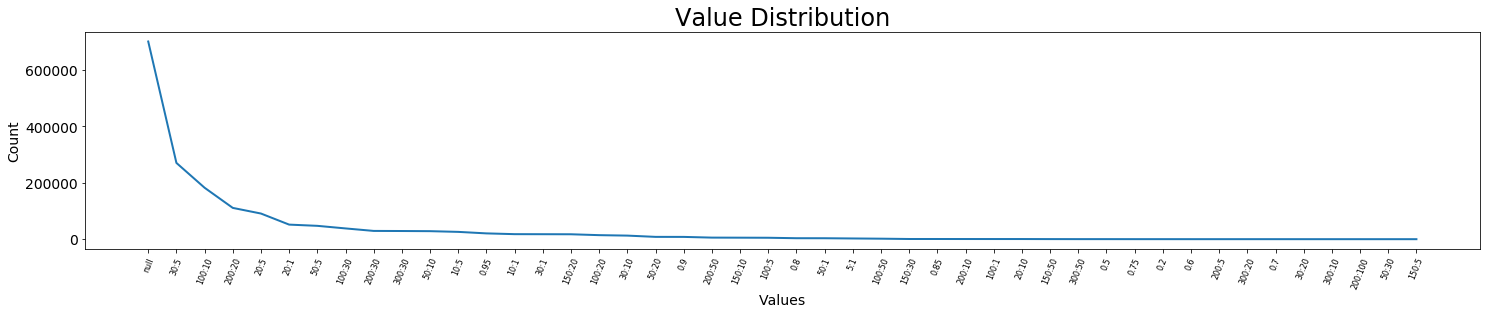

In [29]:
plt.rcParams['figure.figsize'] = (25.0, 4.0)  
plt.title("Value Distribution", fontsize=24)  
plt.xlabel("Values", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
plt.tick_params(axis='both', labelsize=14)  
plt.xticks(size='small', rotation=68,
           fontsize=8)  

plt.plot(off_train['discount_rate'].value_counts(), linewidth=2)
plt.show()

In [31]:
off_train['distance'].value_counts()

0       826070
1       227221
10      206484
2       118413
null    106003
3        76598
4        55085
5        41452
6        32483
7        25681
8        21436
9        17958
Name: distance, dtype: int64

In [32]:
off_test['distance'].value_counts()

0       43867
1       18474
null    12064
10      10353
2        9523
3        5934
4        4006
5        2977
6        2179
7        1685
8        1359
9        1219
Name: distance, dtype: int64

初步观察感觉训练集和测试集数据分布比较一致

### 文本值数值化处理

In [9]:
#分隔符
separator = ':'


#计算折扣率，将满减和折扣统一
#因为discount_rate为null的时候一般都是没有使用优惠券，这个时候折扣应该是1
def get_discount_rate(s):
    s = str(s)
    if s == 'null':
        return -1
        #return 1
    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0 - float(s[1]) / float(s[0])


#获取是否满减（full reduction promotion）
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return 0
    else:
        return 1


#获取满减的条件
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[0])


#获取满减的优惠
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])


#获取月份
def get_month(s):
    if s[0] == 'null':
        return -1
    else:
        return int(s[4:6])


#获取日期
def get_day(s):
    if s[0] == 'null':
        return -1
    else:
        return int(s[6:8])


#获取日期间隔输入内容为Date:Date_received
def get_day_gap(s):
    s = s.split(separator)
    if s[0] == 'null':
        return -1
    if s[1] == 'null':
        return -1
    else:
        return (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
                date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days


#获取Label，输入内容为Date:Date_received
def get_label(s):
    s = s.split(separator)
    if s[0] == 'null':
        return 0
    if s[1] == 'null':
        return -1
    elif (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
          date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days <= 15:
        return 1
    else:
        return -1

In [10]:
def add_feature(df):
    df['if_fd'] = df['discount_rate'].apply(get_if_fd)
    df['full_value'] = df['discount_rate'].apply(get_full_value)
    df['reduction_value'] = df['discount_rate'].apply(get_reduction_value)
    df['discount_rate'] = df['discount_rate'].apply(get_discount_rate)
    df['distance'] = df['distance'].replace('null', -1).astype(int)
    #df['month_received'] = df['date_received'].apply(get_month)
    #df['month'] = df['date'].apply(get_month)
    return df


def add_label(df):
    df['day_gap'] = df['date'].astype(
        'str') + ':' + df['date_received'].astype('str')
    df['label'] = df['day_gap'].apply(get_label)
    df['day_gap'] = df['day_gap'].apply(get_day_gap)
    return df

In [35]:
dftrain = off_train.copy()
dftest = off_test.copy()

In [36]:
dftrain = add_feature(dftrain)
dftrain = add_label(dftrain)
dftest = add_feature(dftest)

### 数值化后再分析

此时数据集使用的是副本 dftrain dftest

In [37]:
dftrain.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,...,if_fd,full_value,reduction_value,day_gap,label
0,1439408,2632,null,-1.000000,0,...,0,-1,-1,-1,-1
1,1439408,4663,11002,0.866667,1,...,1,150,20,-1,0
2,1439408,2632,8591,0.950000,0,...,1,20,1,-1,0
3,1439408,2632,1078,0.950000,0,...,1,20,1,-1,0
4,1439408,2632,8591,0.950000,0,...,1,20,1,-1,0


In [38]:
dftrain.describe()

,discount_rate,distance,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,1.069696e-01,2.158577e+00,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,9.061683e-01,3.470772e+00,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,7.500000e-01,0.000000e+00,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,9.000000e-01,3.000000e+00,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,9.900000e-01,1.000000e+01,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


In [39]:
dftest.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
0,4129537,450,9983,0.833333,1,20160712,1,30,5
1,6949378,1300,3429,0.833333,-1,20160706,1,30,5
2,2166529,7113,6928,0.900000,5,20160727,1,200,20
3,2166529,7113,1808,0.900000,5,20160727,1,100,10
4,6172162,7605,6500,0.966667,2,20160708,1,30,1


In [40]:
dftest.describe()

,discount_rate,distance,date_received,if_fd,full_value,reduction_value
count,113640.000000,113640.000000,1.136400e+05,113640.000000,113640.000000,113640.000000
mean,0.850671,1.974736,2.016072e+07,0.977420,43.396507,6.089141
std,0.063551,3.248809,9.019508e+00,0.148561,44.239815,5.640310
min,0.333333,-1.000000,2.016070e+07,0.000000,-1.000000,-1.000000
25%,0.833333,0.000000,2.016071e+07,1.000000,30.000000,5.000000
50%,0.833333,1.000000,2.016072e+07,1.000000,30.000000,5.000000
75%,0.900000,3.000000,2.016072e+07,1.000000,30.000000,5.000000
max,0.990000,10.000000,2.016073e+07,1.000000,500.000000,100.000000


In [41]:
dftrain[dftrain.distance >= 0]['distance'].value_counts() / dftrain[
    dftrain.distance >= 0]['distance'].count()

0     0.500988
1     0.137803
10    0.125227
2     0.071814
3     0.046455
4     0.033408
5     0.025139
6     0.019700
7     0.015575
8     0.013000
9     0.010891
Name: distance, dtype: float64

In [42]:
dftest[dftest.distance >= 0]['distance'].value_counts() / dftest[
    dftest.distance >= 0]['distance'].count()

0     0.431864
1     0.181874
10    0.101924
2     0.093752
3     0.058419
4     0.039438
5     0.029308
6     0.021452
7     0.016589
8     0.013379
9     0.012001
Name: distance, dtype: float64

In [43]:
print('Offline 训练集满减情况')
dftrain.if_fd.value_counts() / dftrain.if_fd.count()

Offline 训练集满减情况


1    0.581241
0    0.418759
Name: if_fd, dtype: float64

In [44]:
print('测试集满减情况')
dftest.if_fd.value_counts() / dftest.if_fd.count()

测试集满减情况


1    0.97742
0    0.02258
Name: if_fd, dtype: float64

满减情况差异很大，需要处理

### 绘图分布分析

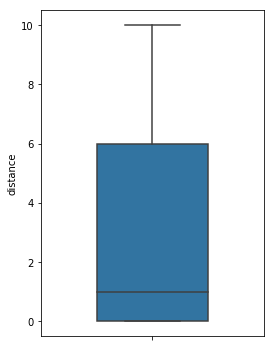

In [45]:
# 箱线图 查看分布特征

fig = plt.figure(figsize=(4, 6))
sns.boxplot(dftrain[(dftrain.label >= 0)
                    & (dftrain.distance >= 0)]['distance'],
            orient="v",
            width=0.5)

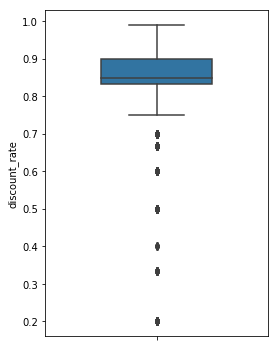

In [47]:
fig = plt.figure(figsize=(4, 6))

sns.boxplot(dftrain[(dftrain.label >= 0)
                    & (dftrain.discount_rate >= 0)]['discount_rate'],
            orient="v",
            width=0.5)

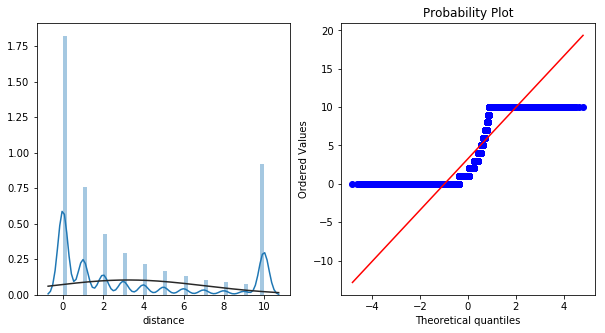

In [48]:
# 直方图和QQ图  QQ--检测是否正态
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
sns.distplot(dftrain[(dftrain.label >= 0)
                     & (dftrain.distance >= 0)]['distance'],
             fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(dftrain[(dftrain.label >= 0)
                             & (dftrain.distance >= 0)]['distance'],
                     plot=plt)

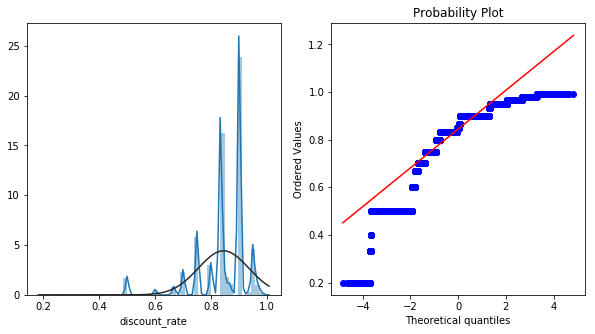

In [49]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
sns.distplot(dftrain[(dftrain.label >= 0)
                     & (dftrain.discount_rate >= 0)]['discount_rate'],
             fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(dftrain[(dftrain.label >= 0)
                             & (dftrain.discount_rate >= 0)]['discount_rate'],
                     plot=plt)

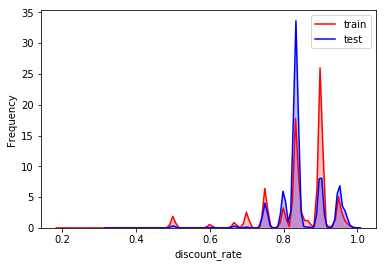

In [50]:
# 分布对比：折扣率 kde核密度估计图更平滑
plt.rcParams['figure.figsize'] = (6.0, 4.0)

ax = sns.kdeplot(dftrain[(dftrain.label >= 0)
                         & (dftrain.discount_rate >= 0)]['discount_rate'],
                 color="Red",
                 shade=True)
ax = sns.kdeplot(dftest[(dftest.discount_rate >= 0)]['discount_rate'],
                 color="Blue",
                 shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

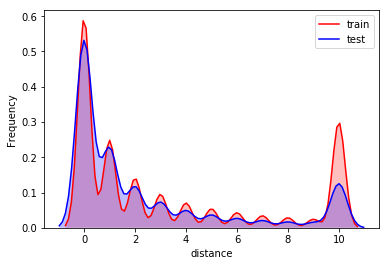

In [51]:
ax = sns.kdeplot(dftrain[(dftrain.label >= 0)
                         & (dftrain.distance >= 0)]['distance'],
                 color="Red",
                 shade=True)
ax = sns.kdeplot(dftest[(dftest.distance >= 0)]['distance'],
                 color="Blue",
                 shade=True)
ax.set_xlabel('distance')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

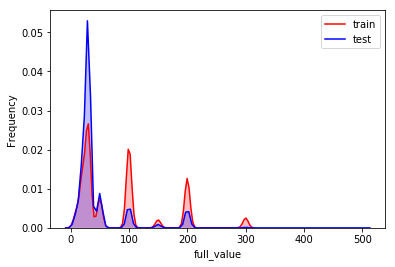

In [52]:
ax = sns.kdeplot(dftrain[(dftrain.label >= 0)
                         & (dftrain.full_value >= 0)]['full_value'],
                 color="Red",
                 shade=True)
ax = sns.kdeplot(dftest[(dftest.full_value >= 0)]['full_value'],
                 color="Blue",
                 shade=True)
ax.set_xlabel('full_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

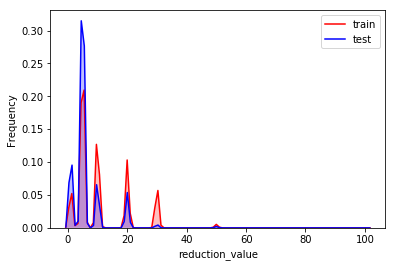

In [53]:
ax = sns.kdeplot(dftrain[(dftrain.label >= 0)
                         & (dftrain.reduction_value >= 0)]['reduction_value'],
                 color="Red",
                 shade=True)
ax = sns.kdeplot(dftest[(dftest.reduction_value >= 0)]['reduction_value'],
                 color="Blue",
                 shade=True)
ax.set_xlabel('reduction_value')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

### 线性关系

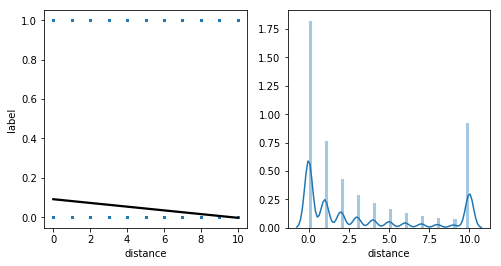

In [54]:
# 两个特征之间的线性关系
# 距离与label
fcols = 2
frows = 1
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
sns.regplot(x='distance',
            y='label',
            data=dftrain[(dftrain.label >= 0)
                         & (dftrain.distance >= 0)][['distance', 'label']],
            ax=ax,
            scatter_kws={
                'marker': '.',
                's': 3,
                'alpha': 0.3
            },
            line_kws={'color': 'k'})
plt.xlabel('distance')
plt.ylabel('label')


ax = plt.subplot(1, 2, 2)
sns.distplot(dftrain[(dftrain.label >= 0)
                     & (dftrain.distance >= 0)]['distance'].dropna())
plt.xlabel('distance')
plt.show()

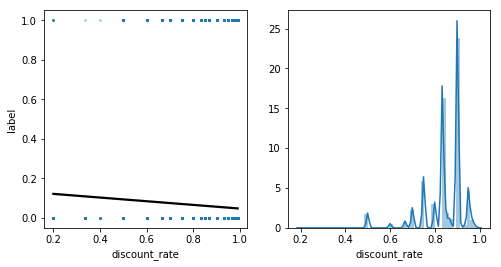

In [55]:
# 折扣率与label
fcols = 2
frows = 1
plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
sns.regplot(x='discount_rate',
            y='label',
            data=dftrain[(dftrain.label >= 0) & (dftrain.discount_rate >= 0)][[
                'discount_rate', 'label'
            ]],
            ax=ax,
            scatter_kws={
                'marker': '.',
                's': 3,
                'alpha': 0.3
            },
            line_kws={'color': 'k'})
plt.xlabel('discount_rate')
plt.ylabel('label')
ax = plt.subplot(1, 2, 2)
sns.distplot(dftrain[(dftrain.label >= 0)
                     & (dftrain.discount_rate >= 0)]['discount_rate'].dropna())
plt.xlabel('discount_rate')
plt.show()

结论： 训练集和测试集，是否为满减优惠券这个特征的分布差别很大，满减占比在两者中相差很大。

## 特征工程

In [11]:
############全局参数#################################
#默认分隔符
fd_seperator = ':'
############目录定义#################################
datapath = './data/'
featurepath = './feature/'
resultpath = './result/'
tmppath = './tmp/'
scorepath = './score/'

In [12]:
###########工具函数#############################################
#计算折扣率，将满减和折扣统一
def get_discount_rate(s):
    s = str(s)
    if s == 'null':
        return -1
    s = s.split(fd_seperator)
    if len(s) == 1:
        return float(s[0])
    else:
        return round((1.0 - float(s[1]) / float(s[0])), 3)


#获取是否满减（full reduction promotion）
def get_if_fd(s):
    s = str(s)
    s = s.split(fd_seperator)
    if len(s) == 1:
        return 0
    else:
        return 1


#获取满减的条件
def get_full_value(s):
    s = str(s)
    s = s.split(fd_seperator)
    if len(s) == 1:
        #return 'null'
        return np.nan
    else:
        return int(s[0])


#获取满减的优惠
def get_reduction_value(s):
    s = str(s)
    s = s.split(fd_seperator)
    if len(s) == 1:
        #return 'null'
        return np.nan
    else:
        return int(s[1])


#获取日期间隔，输入内容为Date_received:Date
def get_day_gap(s):
    s = s.split(fd_seperator)
    if s[0] == 'null':
        return -1
    if s[1] == 'null':
        return -1
    else:
        return (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
                date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days


#获取Label，输入内容为Date:Date_received
def get_label(s):
    s = s.split(fd_seperator)
    if s[0] == 'null':
        return 0
    if s[1] == 'null':
        return -1
    elif (date(int(s[0][0:4]), int(s[0][4:6]), int(s[0][6:8])) -
          date(int(s[1][0:4]), int(s[1][4:6]), int(s[1][6:8]))).days <= 15:
        return 1
    else:
        return 0


#增加折扣相关特征
def add_discount(df):
    df['if_fd'] = df['discount_rate'].apply(get_if_fd)
    df['full_value'] = df['discount_rate'].apply(get_full_value)
    df['reduction_value'] = df['discount_rate'].apply(get_reduction_value)
    df['discount_rate'] = df['discount_rate'].apply(get_discount_rate)
    df.distance = df.distance.replace('null', np.nan)
    return df


#计算日期间隔
def add_day_gap(df):
    df['day_gap'] = df['date'].astype(
        'str') + ':' + df['date_received'].astype('str')
    df['day_gap'] = df['day_gap'].apply(get_day_gap)
    return df


#获取label
def add_label(df):
    df['label'] = df['date'].astype('str') + ':' + df['date_received'].astype(
        'str')
    df['label'] = df['label'].apply(get_label)
    return df


def is_firstlastone(x):
    if x == 0:
        return 1
    elif x > 0:
        return 0
    else:
        #return -1
        return np.nan


def get_day_gap_before(s):
    date_received, dates = s.split('-')
    dates = dates.split(':')
    gaps = []
    for d in dates:
        #将时间差转化为天数
        this_gap = (dt.date(int(date_received[0:4]), int(date_received[4:6]),
                            int(date_received[6:8])) -
                    dt.date(int(d[0:4]), int(d[4:6]), int(d[6:8]))).days
        if this_gap > 0:
            gaps.append(this_gap)
    if len(gaps) == 0:
        #return -1
        return np.nan
    else:
        return min(gaps)


def get_day_gap_after(s):
    date_received, dates = s.split('-')
    dates = dates.split(':')
    gaps = []
    for d in dates:
        this_gap = (dt.datetime(int(d[0:4]), int(d[4:6]), int(d[6:8])) -
                    dt.datetime(int(date_received[0:4]), int(
                        date_received[4:6]), int(date_received[6:8]))).days
        if this_gap > 0:
            gaps.append(this_gap)
    if len(gaps) == 0:
        #return -1
        return np.nan
    else:
        return min(gaps)


In [13]:
# 统计特征处理函数
# df: 添加特征的dataframe
# df_group: 特征生成的数据集
# group_cols: group by 的列
# value_col: 被统计的列
# agg_ops:处理方式 包括：count,mean,sum,std,max,min,nunique
# colname: 新特征的名称
def add_agg_feature_names(df, df_group, group_cols, value_col, agg_ops,
                          col_names):
    df_group[value_col] = df_group[value_col].astype('float')
    df_agg = pd.DataFrame(
        df_group.groupby(group_cols)[value_col].agg(agg_ops)).reset_index()
    df_agg.columns = group_cols + col_names
    df = df.merge(df_agg, on=group_cols, how="left")
    return df


# 统计特征处理函数
# 名称按照keyword+'_'+value_col+'_'+op 自动增加
def add_agg_feature(df, df_group, group_cols, value_col, agg_ops, keyword):
    col_names = []
    for op in agg_ops:
        col_names.append(keyword + '_' + value_col + '_' + op)
    df = add_agg_feature_names(df, df_group, group_cols, value_col, agg_ops,
                               col_names)
    return df


# 因为count特征很多，开发了这个专门提取count特征的函数
def add_count_new_feature(df, df_group, group_cols, new_feature_name):
    df_group[new_feature_name] = 1
    df_group = df_group.groupby(group_cols).agg('sum').reset_index()
    df = df.merge(df_group, on=group_cols, how="left")
    return df

In [14]:

# 获取商家相关特征
def get_merchant_feature(feature):
    merchant = feature[[
        'merchant_id', 'coupon_id', 'distance', 'date_received', 'date'
    ]].copy()
    t = merchant[['merchant_id']].copy()
    #删除重复行数据
    t.drop_duplicates(inplace=True)

    #每个商户的交易总次数
    t1 = merchant[merchant.date != 'null'][['merchant_id']].copy()
    merchant_feature = add_count_new_feature(t, t1, 'merchant_id',
                                             'total_sales')

    #每个商户销售中，使用了优惠券的交易次数（正样本）
    t2 = merchant[(merchant.date != 'null')
                  & (merchant.coupon_id != 'null')][['merchant_id']].copy()
    merchant_feature = add_count_new_feature(merchant_feature, t2,
                                             'merchant_id', 'sales_use_coupon')

    #每个商户发放的优惠券总数
    t3 = merchant[merchant.coupon_id != 'null'][['merchant_id']].copy()
    merchant_feature = add_count_new_feature(merchant_feature, t3,
                                             'merchant_id', 'total_coupon')

    #在每个线下商户含有优惠券的交易中，统计和用户距离的最大值、最小值、平均值、中位值
    t4 = merchant[(merchant.date != 'null') & (merchant.coupon_id != 'null') &
                  (merchant.distance != 'null')][['merchant_id',
                                                  'distance']].copy()
    t4.distance = t4.distance.astype('int')
    merchant_feature = add_agg_feature(merchant_feature, t4, ['merchant_id'],
                                       'distance',
                                       ['min', 'max', 'mean', 'median'],
                                       'merchant')

    #将数据中的NaN用0来替换
    merchant_feature.sales_use_coupon = merchant_feature.sales_use_coupon.replace(
        np.nan, 0)
    #商户发放优惠券的使用率
    merchant_feature[
        'merchant_coupon_transfer_rate'] = merchant_feature.sales_use_coupon.astype(
            'float') / merchant_feature.total_coupon
    #商户的交易中，使用优惠券的交易占比
    merchant_feature['coupon_rate'] = merchant_feature.sales_use_coupon.astype(
        'float') / merchant_feature.total_sales
    #将数据中的NaN用0来替换
    merchant_feature.total_coupon = merchant_feature.total_coupon.replace(
        np.nan, 0)

    return merchant_feature

In [15]:
# 获取用户相关特征
def get_user_feature(feature):
    #for dataset3
    user = feature[[
        'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
        'date_received', 'date'
    ]].copy()

    t = user[['user_id']].copy()
    t.drop_duplicates(inplace=True)

    # 每个用户交易的商户数
    t1 = user[user.date != 'null'][['user_id', 'merchant_id']].copy()
    t1.drop_duplicates(inplace=True)
    t1 = t1[['user_id']]
    user_feature = add_count_new_feature(t, t1, 'user_id', 'count_merchant')

    #在每个用户线下使用优惠券产生的交易中，统计和商户距离的最大值、最小值、平均值、中位值
    t2 = user[(user.date != 'null') & (user.coupon_id != 'null') &
              (user.distance != 'null')][['user_id', 'distance']]
    t2.distance = t2.distance.astype('int')
    user_feature = add_agg_feature(user_feature, t2, ['user_id'], 'distance',
                                   ['min', 'max', 'mean', 'median'], 'user')

    #每个用户使用优惠券消费的次数
    t7 = user[(user.date != 'null') & (user.coupon_id != 'null')][['user_id']]
    user_feature = add_count_new_feature(user_feature, t7, 'user_id',
                                         'buy_use_coupon')

    #每个用户消费的总次数
    t8 = user[user.date != 'null'][['user_id']]
    user_feature = add_count_new_feature(user_feature, t8, 'user_id',
                                         'buy_total')

    #每个用户收到优惠券的总数
    t9 = user[user.coupon_id != 'null'][['user_id']]
    user_feature = add_count_new_feature(user_feature, t9, 'user_id',
                                         'coupon_received')

    #用户从收到优惠券到用券消费的时间间隔，统计其最大值、最小值、平均值、中位值
    t10 = user[(user.date_received != 'null')
               & (user.date != 'null')][['user_id', 'date_received', 'date']]
    t10 = add_day_gap(t10)
    t10 = t10[['user_id', 'day_gap']]
    user_feature = add_agg_feature(user_feature, t10, ['user_id'], 'day_gap',
                                   ['min', 'max', 'mean', 'median'], 'user')
    #将数据中的NaN用0来替换
    user_feature.count_merchant = user_feature.count_merchant.replace(
        np.nan, 0)
    user_feature.buy_use_coupon = user_feature.buy_use_coupon.replace(
        np.nan, 0)
    #统计用户用券消费在用户总消费次数的占比
    user_feature['buy_use_coupon_rate'] = user_feature.buy_use_coupon.astype(
        'float') / user_feature.buy_total.astype('float')
    #统计用户收到消费券的使用率
    user_feature[
        'user_coupon_transfer_rate'] = user_feature.buy_use_coupon.astype(
            'float') / user_feature.coupon_received.astype('float')
    #将数据中的NaN用0来替换
    user_feature.buy_total = user_feature.buy_total.replace(np.nan, 0)
    user_feature.coupon_received = user_feature.coupon_received.replace(
        np.nan, 0)
    return user_feature

In [16]:
#提取用户和商户关系特征
def get_user_merchant_feature(feature):
    t = feature[['user_id', 'merchant_id']].copy()
    t.drop_duplicates(inplace=True)

    #一个用户在一个商家交易的总次数
    t0 = feature[['user_id', 'merchant_id', 'date']].copy()
    t0 = t0[t0.date != 'null'][['user_id', 'merchant_id']]
    user_merchant = add_count_new_feature(t, t0, ['user_id', 'merchant_id'],
                                          'user_merchant_buy_total')

    #一个用户在一个商家一共收到的优惠券数量
    t1 = feature[['user_id', 'merchant_id', 'coupon_id']]
    t1 = t1[t1.coupon_id != 'null'][['user_id', 'merchant_id']]
    user_merchant = add_count_new_feature(user_merchant, t1,
                                          ['user_id', 'merchant_id'],
                                          'user_merchant_received')

    #一个用户在一个商家使用优惠券消费的次数
    t2 = feature[['user_id', 'merchant_id', 'date', 'date_received']]
    t2 = t2[(t2.date != 'null')
            & (t2.date_received != 'null')][['user_id', 'merchant_id']]
    user_merchant = add_count_new_feature(user_merchant, t2,
                                          ['user_id', 'merchant_id'],
                                          'user_merchant_buy_use_coupon')

    #一个用户在一个商家的到店次数
    t3 = feature[['user_id', 'merchant_id']]
    user_merchant = add_count_new_feature(user_merchant, t3,
                                          ['user_id', 'merchant_id'],
                                          'user_merchant_any')

    #一个用户在一个商家没有使用优惠券消费的次数
    t4 = feature[['user_id', 'merchant_id', 'date', 'coupon_id']]
    t4 = t4[(t4.date != 'null')
            & (t4.coupon_id == 'null')][['user_id', 'merchant_id']]
    user_merchant = add_count_new_feature(user_merchant, t4,
                                          ['user_id', 'merchant_id'],
                                          'user_merchant_buy_common')
    #将数据中的NaN用0来替换
    user_merchant.user_merchant_buy_use_coupon = user_merchant.user_merchant_buy_use_coupon.replace(
        np.nan, 0)
    user_merchant.user_merchant_buy_common = user_merchant.user_merchant_buy_common.replace(
        np.nan, 0)
    #一个用户对一个商家发放的优惠券的使用率
    user_merchant[
        'user_merchant_coupon_transfer_rate'] = user_merchant.user_merchant_buy_use_coupon.astype(
            'float') / user_merchant.user_merchant_received.astype('float')
    #一个用户在一个商家总的消费次数中，用优惠券的消费次数占比
    user_merchant[
        'user_merchant_coupon_buy_rate'] = user_merchant.user_merchant_buy_use_coupon.astype(
            'float') / user_merchant.user_merchant_buy_total.astype('float')
    #一个用户到店后消费的可能性统计
    user_merchant[
        'user_merchant_rate'] = user_merchant.user_merchant_buy_total.astype(
            'float') / user_merchant.user_merchant_any.astype('float')
    #一个用户在一个商家总的消费次数中，不用优惠券的消费次数占比
    user_merchant[
        'user_merchant_common_buy_rate'] = user_merchant.user_merchant_buy_common.astype(
            'float') / user_merchant.user_merchant_buy_total.astype('float')
    return user_merchant

In [17]:
#提取穿越特征
def get_leakage_feature(dataset):
    t = dataset[['user_id']].copy()
    t['this_month_user_receive_all_coupon_count'] = 1
    t = t.groupby('user_id').agg('sum').reset_index()

    t1 = dataset[['user_id', 'coupon_id']].copy()
    t1['this_month_user_receive_same_coupn_count'] = 1
    t1 = t1.groupby(['user_id', 'coupon_id']).agg('sum').reset_index()

    t2 = dataset[['user_id', 'coupon_id', 'date_received']].copy()
    t2.date_received = t2.date_received.astype('str')
    #如果出现相同的用户接收相同的优惠券在接收时间上用‘：’连接上第n次接受优惠券的时间
    t2 = t2.groupby([
        'user_id', 'coupon_id'
    ])['date_received'].agg(lambda x: ':'.join(x)).reset_index()
    #将接收时间的一组按着':'分开，这样就可以计算接受了优惠券的数量,apply是合并
    t2['receive_number'] = t2.date_received.apply(lambda s: len(s.split(':')))
    t2 = t2[t2.receive_number > 1]
    #最大接受的日期
    t2['max_date_received'] = t2.date_received.apply(
        lambda s: max([int(d) for d in s.split(':')]))
    #最小的接收日期
    t2['min_date_received'] = t2.date_received.apply(
        lambda s: min([int(d) for d in s.split(':')]))
    t2 = t2[['user_id', 'coupon_id', 'max_date_received', 'min_date_received']]

    t3 = dataset[['user_id', 'coupon_id', 'date_received']]
    #将两表融合只保留左表数据,这样得到的表，相当于保留了最近接收时间和最远接受时间
    t3 = pd.merge(t3, t2, on=['user_id', 'coupon_id'], how='left')
    #这个优惠券最近接受时间
    t3['this_month_user_receive_same_coupon_lastone'] = t3.max_date_received - t3.date_received.astype(
        int)
    #这个优惠券最远接受时间
    t3['this_month_user_receive_same_coupon_firstone'] = t3.date_received.astype(
        int) - t3.min_date_received

    t3.this_month_user_receive_same_coupon_lastone = t3.this_month_user_receive_same_coupon_lastone.apply(
        is_firstlastone)
    t3.this_month_user_receive_same_coupon_firstone = t3.this_month_user_receive_same_coupon_firstone.apply(
        is_firstlastone)
    t3 = t3[[
        'user_id', 'coupon_id', 'date_received',
        'this_month_user_receive_same_coupon_lastone',
        'this_month_user_receive_same_coupon_firstone'
    ]]

    #提取第四个特征,一个用户所接收到的所有优惠券的数量
    t4 = dataset[['user_id', 'date_received']].copy()
    t4['this_day_receive_all_coupon_count'] = 1
    t4 = t4.groupby(['user_id', 'date_received']).agg('sum').reset_index()

    #提取第五个特征,一个用户不同时间所接收到不同优惠券的数量
    t5 = dataset[['user_id', 'coupon_id', 'date_received']].copy()
    t5['this_day_user_receive_same_coupon_count'] = 1
    t5 = t5.groupby(['user_id', 'coupon_id',
                     'date_received']).agg('sum').reset_index()

    #一个用户不同优惠券 的接受时间
    t6 = dataset[['user_id', 'coupon_id', 'date_received']].copy()
    t6.date_received = t6.date_received.astype('str')
    t6 = t6.groupby([
        'user_id', 'coupon_id'
    ])['date_received'].agg(lambda x: ':'.join(x)).reset_index()
    t6.rename(columns={'date_received': 'dates'}, inplace=True)

    t7 = dataset[['user_id', 'coupon_id', 'date_received']]
    t7 = pd.merge(t7, t6, on=['user_id', 'coupon_id'], how='left')
    t7['date_received_date'] = t7.date_received.astype('str') + '-' + t7.dates
    t7['day_gap_before'] = t7.date_received_date.apply(get_day_gap_before)
    t7['day_gap_after'] = t7.date_received_date.apply(get_day_gap_after)
    t7 = t7[[
        'user_id', 'coupon_id', 'date_received', 'day_gap_before',
        'day_gap_after'
    ]]

    other_feature = pd.merge(t1, t, on='user_id')
    other_feature = pd.merge(other_feature, t3, on=['user_id', 'coupon_id'])
    other_feature = pd.merge(other_feature,
                             t4,
                             on=['user_id', 'date_received'])
    other_feature = pd.merge(other_feature,
                             t5,
                             on=['user_id', 'coupon_id', 'date_received'])
    other_feature = pd.merge(other_feature,
                             t7,
                             on=['user_id', 'coupon_id', 'date_received'])
    return other_feature

In [25]:
def get_time_feature(dataset):
    import datetime
    
    tmp = dataset['date_received'].map(
        lambda x: datetime.datetime.strptime(str(x), "%Y%m%d"))

    # 是否周末'
    dataset['ifweekend'] = tmp.map(
        lambda x: 1 if (datetime.date.isoweekday(x) == 6) | (datetime.date.isoweekday(x) == 7) else 0
    )

    # 是否周六'
    dataset['ifSat'] = tmp.map(
        lambda x: 1 if datetime.date.isoweekday(x) == 6 else 0
    )

    # 是否周日'
    dataset['ifSun'] = tmp.map(
        lambda x: 1 if datetime.date.isoweekday(x) == 7 else 0
    )

    # 是否工作日'
    dataset['ifweekday'] = dataset['ifweekend'].map(
        lambda x: 1 if x == 0 else 0
    )

    # 是否上旬'
    dataset['first_ten_day']=tmp.map(
        lambda x:1 if (x.day>=1)&(x.day<=10) else 0
    )

    # 是否中旬'
    dataset['second_ten_day'] = tmp.map(
        lambda x: 1 if (x.day >=11) & (x.day <= 20) else 0
    )

    # 是否下旬'
    dataset['third_ten_day'] = tmp.map(
        lambda x: 1 if (x.day >= 21) & (x.day <= 31) else 0
    )

    # 是否五一'
    dataset['if51']=tmp.map(
        lambda x: 1 if (x.month==5)&(x.day==1) else 0
    )

    # 是否六一'
    dataset['if61']=tmp.map(
        lambda x:1 if (x.month==6)&(x.day==1) else 0
    )

    # 是否端午6.9'
    dataset['ifDuanWu']=tmp.map(
        lambda x:1 if (x.month==6)&(x.day==9) else 0
    )

    # 是否母亲节5.8'
    dataset['ifMomDay']=tmp.map(
        lambda x:1 if (x.month==5)&(x.day==8) else 0
    )

    # 是否父亲节6.19
    dataset['ifDadyDay']=tmp.map(
        lambda x:1 if (x.month==6)&(x.day==19) else 0
    )

    # 是否夏至6.21
    dataset['SummerSol']=tmp.map(
        lambda x:1 if (x.month==6)&(x.day==21) else 0
    )

    return dataset

In [19]:
### 特征集成
#特征1只有最基础的特征
def f1(dataset, if_train):
    result = add_discount(dataset)
    result.drop_duplicates(inplace=True)
    result = get_time_feature(result)
    
    if if_train:
        result = add_label(result)
    return result


#特征2增加Merchant,user特征
def f2(dataset, feature, if_train):
    result = add_discount(dataset)
    merchant_feature = get_merchant_feature(feature)
    result = result.merge(merchant_feature, on='merchant_id', how="left")
    user_feature = get_user_feature(feature)
    result = result.merge(user_feature, on='user_id', how="left")
    user_merchant = get_user_merchant_feature(feature)
    result = result.merge(user_merchant,
                          on=['user_id', 'merchant_id'],
                          how="left")
    result.drop_duplicates(inplace=True)
    result = get_time_feature(result)

    if if_train:
        result = add_label(result)
    return result


#特征3增加leakage特征
def f3(dataset, feature, if_train):
    result = add_discount(dataset)
    merchant_feature = get_merchant_feature(feature)
    result = result.merge(merchant_feature, on='merchant_id', how="left")
    user_feature = get_user_feature(feature)
    result = result.merge(user_feature, on='user_id', how="left")
    user_merchant = get_user_merchant_feature(feature)
    result = result.merge(user_merchant,
                          on=['user_id', 'merchant_id'],
                          how="left")

    leakage_feature = get_leakage_feature(dataset)
    result = result.merge(leakage_feature,
                          on=['user_id', 'coupon_id', 'date_received'],
                          how='left')

    result.drop_duplicates(inplace=True)
    result = get_time_feature(result)

    if if_train:
        result = add_label(result)
    return result

支持不滑窗和滑窗两种方式

不滑窗的特征：特征名：训练集：train版本函数，测试集:test版本函数
normal_feature_generate(feature_function)

滑窗特征（就是不同时间段的特征交叉）：特征名：训练集：train_s版本函数，测试集:test_s版本函数, s是slide滑窗的意思
slide_feature_generate(feature_function)

In [20]:
# 生成不滑窗的特征
# 特征名：训练集：train_版本函数，测试集:test_版本函数
def normal_feature_generate(feature_function):
    off_train = pd.read_csv(datapath + 'ccf_offline_stage1_train.csv',
                            header=0,
                            keep_default_na=False)
    off_train.columns = [
        'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
        'date_received', 'date'
    ]

    off_test = pd.read_csv(datapath + 'ccf_offline_stage1_test_revised.csv',
                           header=0,
                           keep_default_na=False)
    off_test.columns = [
        'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
        'date_received'
    ]

    #取时间大于'20160501'是为了数据量少点，模型算的快一点，如果时间够的话，可以不加这个限制
    off_train = off_train[(off_train.coupon_id != 'null')
                          & (off_train.date_received != 'null') &
                          (off_train.date_received >= '20160501')]

    dftrain = feature_function(off_train, True)

    dftest = feature_function(off_test, False)

    dftrain.drop(['date'], axis=1, inplace=True)
    dftrain.drop(['merchant_id'], axis=1, inplace=True)
    dftest.drop(['merchant_id'], axis=1, inplace=True)

    #特征保存完成
    print('特征保存完成')
    dftrain.to_csv(featurepath + 'train_' + feature_function.__name__ + '.csv',
                   index=False,
                   sep=',')
    dftest.to_csv(featurepath + 'test_' + feature_function.__name__ + '.csv',
                  index=False,
                  sep=',')


#生成滑窗特征
# 特征名：训练集：train_s版本函数，测试集:test_s版本函数, s是slide滑窗的意思
def slide_feature_generate(feature_function):
    off_train = pd.read_csv(datapath + 'ccf_offline_stage1_train.csv',
                            header=0,
                            keep_default_na=False)
    off_train.columns = [
        'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
        'date_received', 'date'
    ]

    off_test = pd.read_csv(datapath + 'ccf_offline_stage1_test_revised.csv',
                           header=0,
                           keep_default_na=False)
    off_test.columns = [
        'user_id', 'merchant_id', 'coupon_id', 'discount_rate', 'distance',
        'date_received'
    ]

    #交叉训练集一：收到券的日期大于4月14日和小于5月14日
    dataset1 = off_train[(off_train.date_received >= '201604014')
                         & (off_train.date_received <= '20160514')]
    #交叉训练集一特征：线下数据中领券和用券日期大于1月1日和小于4月13日
    feature1 = off_train[(off_train.date >= '20160101') &
                         (off_train.date <= '20160413') |
                         ((off_train.date == 'null') &
                          (off_train.date_received >= '20160101') &
                          (off_train.date_received <= '20160413'))]

    #交叉训练集二：收到券的日期大于5月15日和小于6月15日
    dataset2 = off_train[(off_train.date_received >= '20160515')
                         & (off_train.date_received <= '20160615')]
    #交叉训练集二特征：线下数据中领券和用券日期大于2月1日和小于5月14日
    feature2 = off_train[(off_train.date >= '20160201') &
                         (off_train.date <= '20160514') |
                         ((off_train.date == 'null') &
                          (off_train.date_received >= '20160201') &
                          (off_train.date_received <= '20160514'))]

    #测试集
    dataset3 = off_test
    #测试集特征 :线下数据中领券和用券日期大于3月15日和小于6月30日的
    feature3 = off_train[((off_train.date >= '20160315') &
                          (off_train.date <= '20160630')) |
                         ((off_train.date == 'null') &
                          (off_train.date_received >= '20160315') &
                          (off_train.date_received <= '20160630'))]

    dftrain1 = feature_function(dataset1, feature1, True)
    dftrain2 = feature_function(dataset2, feature2, True)
    dftrain = pd.concat([dftrain1, dftrain2], axis=0)

    dftest = feature_function(dataset3, feature3, False)

    dftrain.drop(['date'], axis=1, inplace=True)
    dftrain.drop(['merchant_id'], axis=1, inplace=True)
    dftest.drop(['merchant_id'], axis=1, inplace=True)

    #特征保存完成
    print('特征保存完成')
    dftrain.to_csv(featurepath + 'train_s' + feature_function.__name__ +
                   '.csv',
                   index=False,
                   sep=',')
    dftest.to_csv(featurepath + 'test_s' + feature_function.__name__ + '.csv',
                  index=False,
                  sep=',')

In [26]:
#生成特征文件
#f1
normal_feature_generate(f1)
#sf2
slide_feature_generate(f2)
#sf3
slide_feature_generate(f3)

特征保存完成
特征保存完成
特征保存完成


### 特征分析

In [27]:
############全局参数#################################
id_col_names = ['user_id', 'coupon_id', 'date_received']
target_col_name = 'label'
id_target_cols = ['user_id', 'coupon_id', 'date_received', 'label']


###########数据读取工具函数#############################################
#返回ID列
def get_id_df(df):
    return df[id_col_names]


#返回Target列
def get_target_df(df):
    return df[target_col_name]


#返回特征列
def get_predictors_df(df):
    predictors = [f for f in df.columns if f not in id_target_cols]
    return df[predictors]


#按特征名读取训练集
def read_featurefile_train(featurename):
    df = pd.read_csv(featurepath + 'train_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    #df.fillna(0,inplace=True)
    return df


#按特征名读取测试集
def read_featurefile_test(featurename):
    df = pd.read_csv(featurepath + 'test_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    #df.fillna(0,inplace=True)
    return df


#按特征名读取数据
def read_data(featurename):
    traindf = read_featurefile_train(featurename)
    testdf = read_featurefile_test(featurename)
    return traindf, testdf

In [28]:
#对SF3（最全的一版）版本特征进行分析
traindf, testdf = read_data('sf3')
train_X = get_predictors_df(traindf)
train_y = get_target_df(traindf)
test_X = get_predictors_df(testdf)

In [29]:
traindf.describe()

,user_id,coupon_id,discount_rate,distance,date_received,...,ifDuanWu,ifMomDay,ifDadyDay,SummerSol,label
count,4.381660e+05,438166.000000,438166.000000,390697.000000,4.381660e+05,...,438166.000000,438166.00000,438166.0,438166.0,438166.000000
mean,3.682005e+06,6382.714369,0.841735,2.345954,2.016051e+07,...,0.014305,0.00846,0.0,0.0,0.076403
std,2.123942e+06,3801.424670,0.089430,3.343100,6.824082e+01,...,0.118745,0.09159,0.0,0.0,0.265641
min,4.000000e+00,1.000000,0.333000,0.000000,2.016040e+07,...,0.000000,0.00000,0.0,0.0,0.000000
25%,1.838974e+06,2705.000000,0.833000,0.000000,2.016043e+07,...,0.000000,0.00000,0.0,0.0,0.000000
50%,3.682408e+06,6036.000000,0.833000,1.000000,2.016052e+07,...,0.000000,0.00000,0.0,0.0,0.000000
75%,5.523967e+06,9487.000000,0.900000,3.000000,2.016053e+07,...,0.000000,0.00000,0.0,0.0,0.000000
max,7.360961e+06,14045.000000,0.990000,10.000000,2.016062e+07,...,1.000000,1.00000,0.0,0.0,1.000000


In [30]:
testdf.describe()

,user_id,coupon_id,discount_rate,distance,date_received,...,if61,ifDuanWu,ifMomDay,ifDadyDay,SummerSol
count,1.128030e+05,112803.000000,112803.000000,100812.000000,1.128030e+05,...,112803.0,112803.0,112803.0,112803.0,112803.0
mean,3.684618e+06,9064.658006,0.850368,2.331548,2.016072e+07,...,0.0,0.0,0.0,0.0,0.0
std,2.126358e+06,4147.283515,0.063048,3.260678,9.017693e+00,...,0.0,0.0,0.0,0.0,0.0
min,2.090000e+02,3.000000,0.333000,0.000000,2.016070e+07,...,0.0,0.0,0.0,0.0,0.0
25%,1.843824e+06,5035.000000,0.833000,0.000000,2.016071e+07,...,0.0,0.0,0.0,0.0,0.0
50%,3.683073e+06,9983.000000,0.833000,1.000000,2.016072e+07,...,0.0,0.0,0.0,0.0,0.0
75%,5.525176e+06,13602.000000,0.900000,3.000000,2.016072e+07,...,0.0,0.0,0.0,0.0,0.0
max,7.361024e+06,14045.000000,0.990000,10.000000,2.016073e+07,...,0.0,0.0,0.0,0.0,0.0


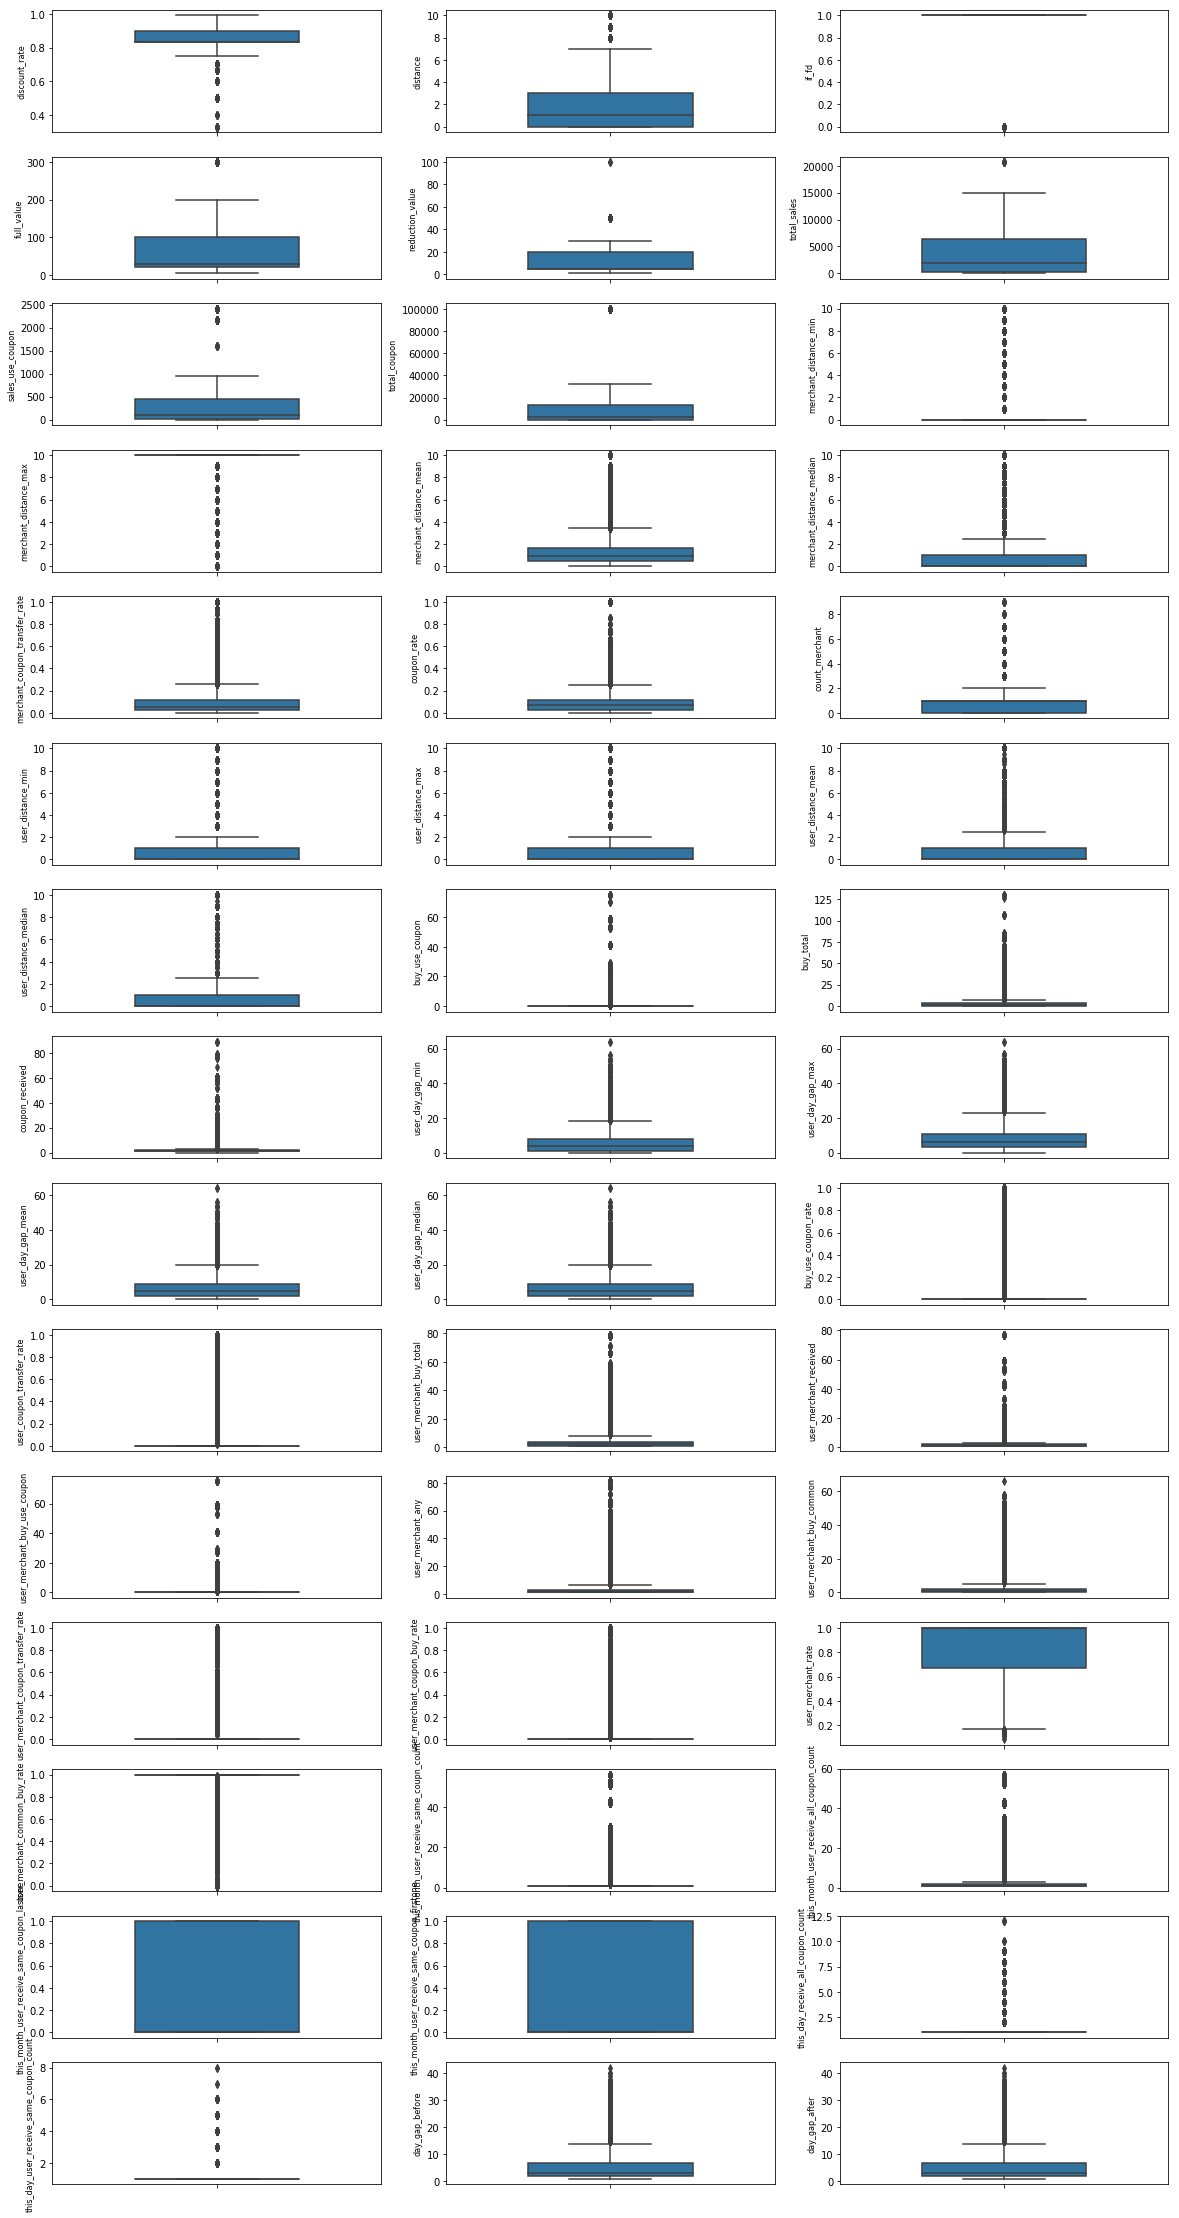

In [31]:
# 画箱式图
column = train_X.columns.tolist()[:46]  
fig = plt.figure(figsize=(20, 40))  
for i in range(45):
    plt.subplot(15, 3, i + 1)  
    sns.boxplot(train_X[column[i]], orient="v", width=0.5)  
    plt.ylabel(column[i], fontsize=8)
plt.show()

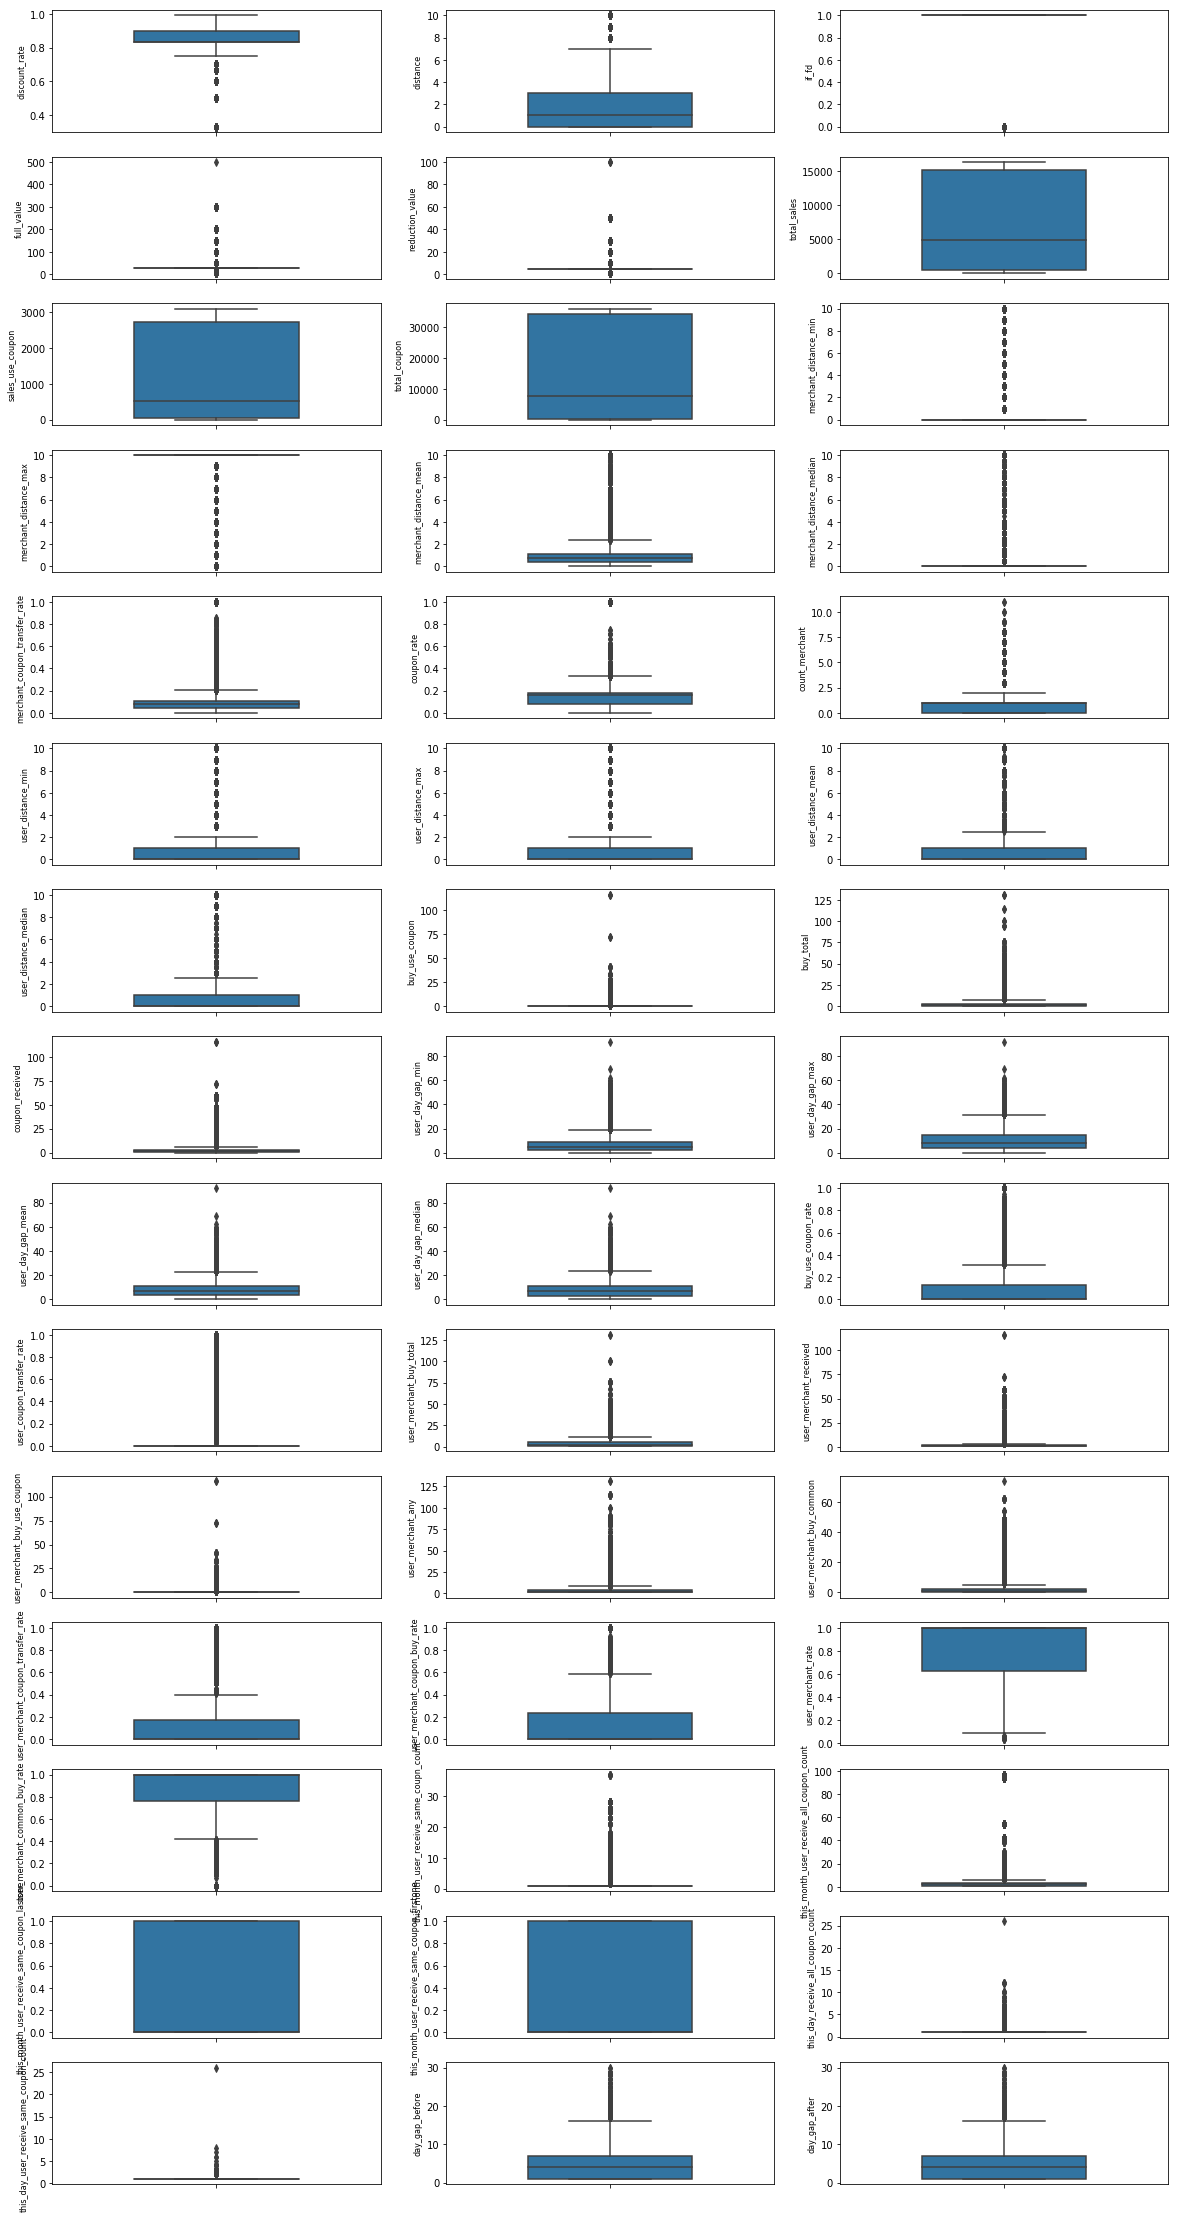

In [32]:
column = test_X.columns.tolist()[:46]  
fig = plt.figure(figsize=(20, 40))  
for i in range(45):
    plt.subplot(15, 3, i + 1)  
    sns.boxplot(test_X[column[i]], orient="v", width=0.5)  
    plt.ylabel(column[i], fontsize=8)
plt.show()

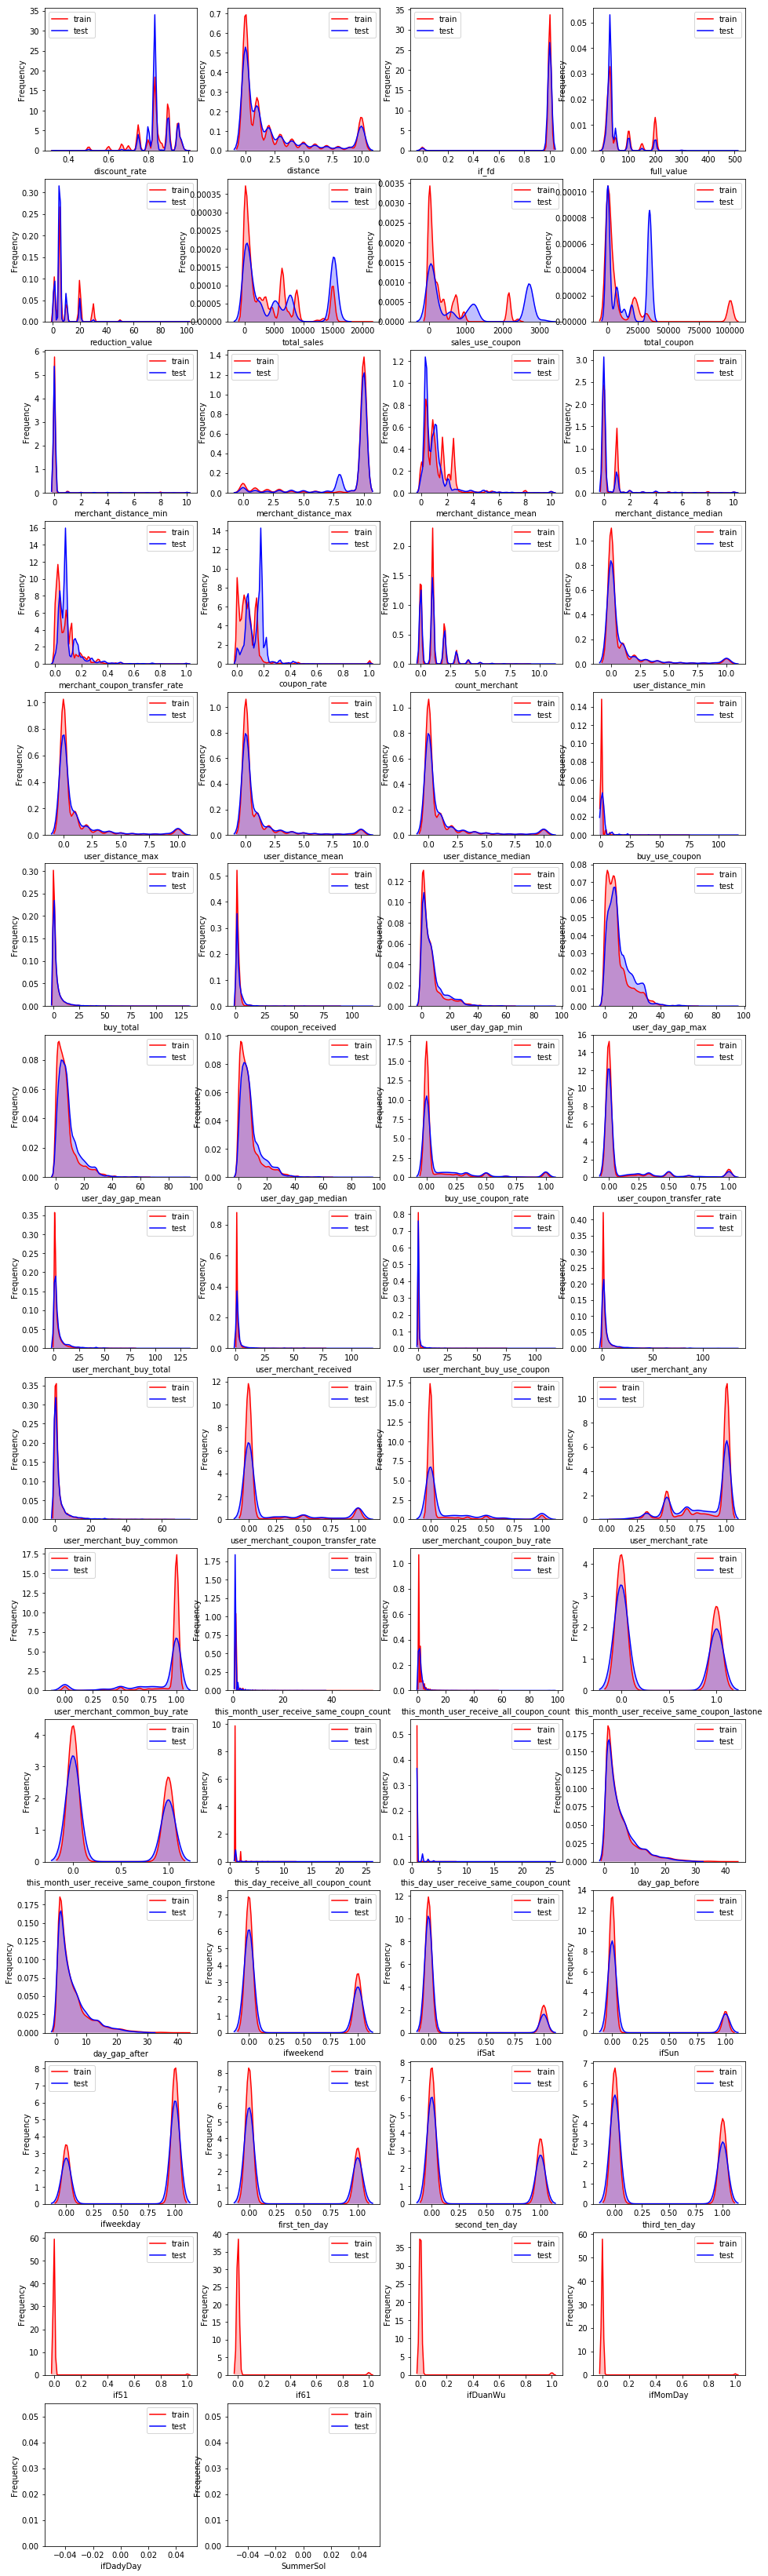

In [33]:
#对比分布
dist_cols = 4
dist_rows = len(test_X.columns)

plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

for i, col in enumerate(test_X.columns):
    ax = plt.subplot(dist_rows, dist_cols, i + 1)
    ax = sns.kdeplot(train_X[col], color="Red", shade=True)
    ax = sns.kdeplot(test_X[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

plt.show()

测试集主要是满减，所以我们再对比一下训练集满减数据的分布与测试集满减数据分布的对比

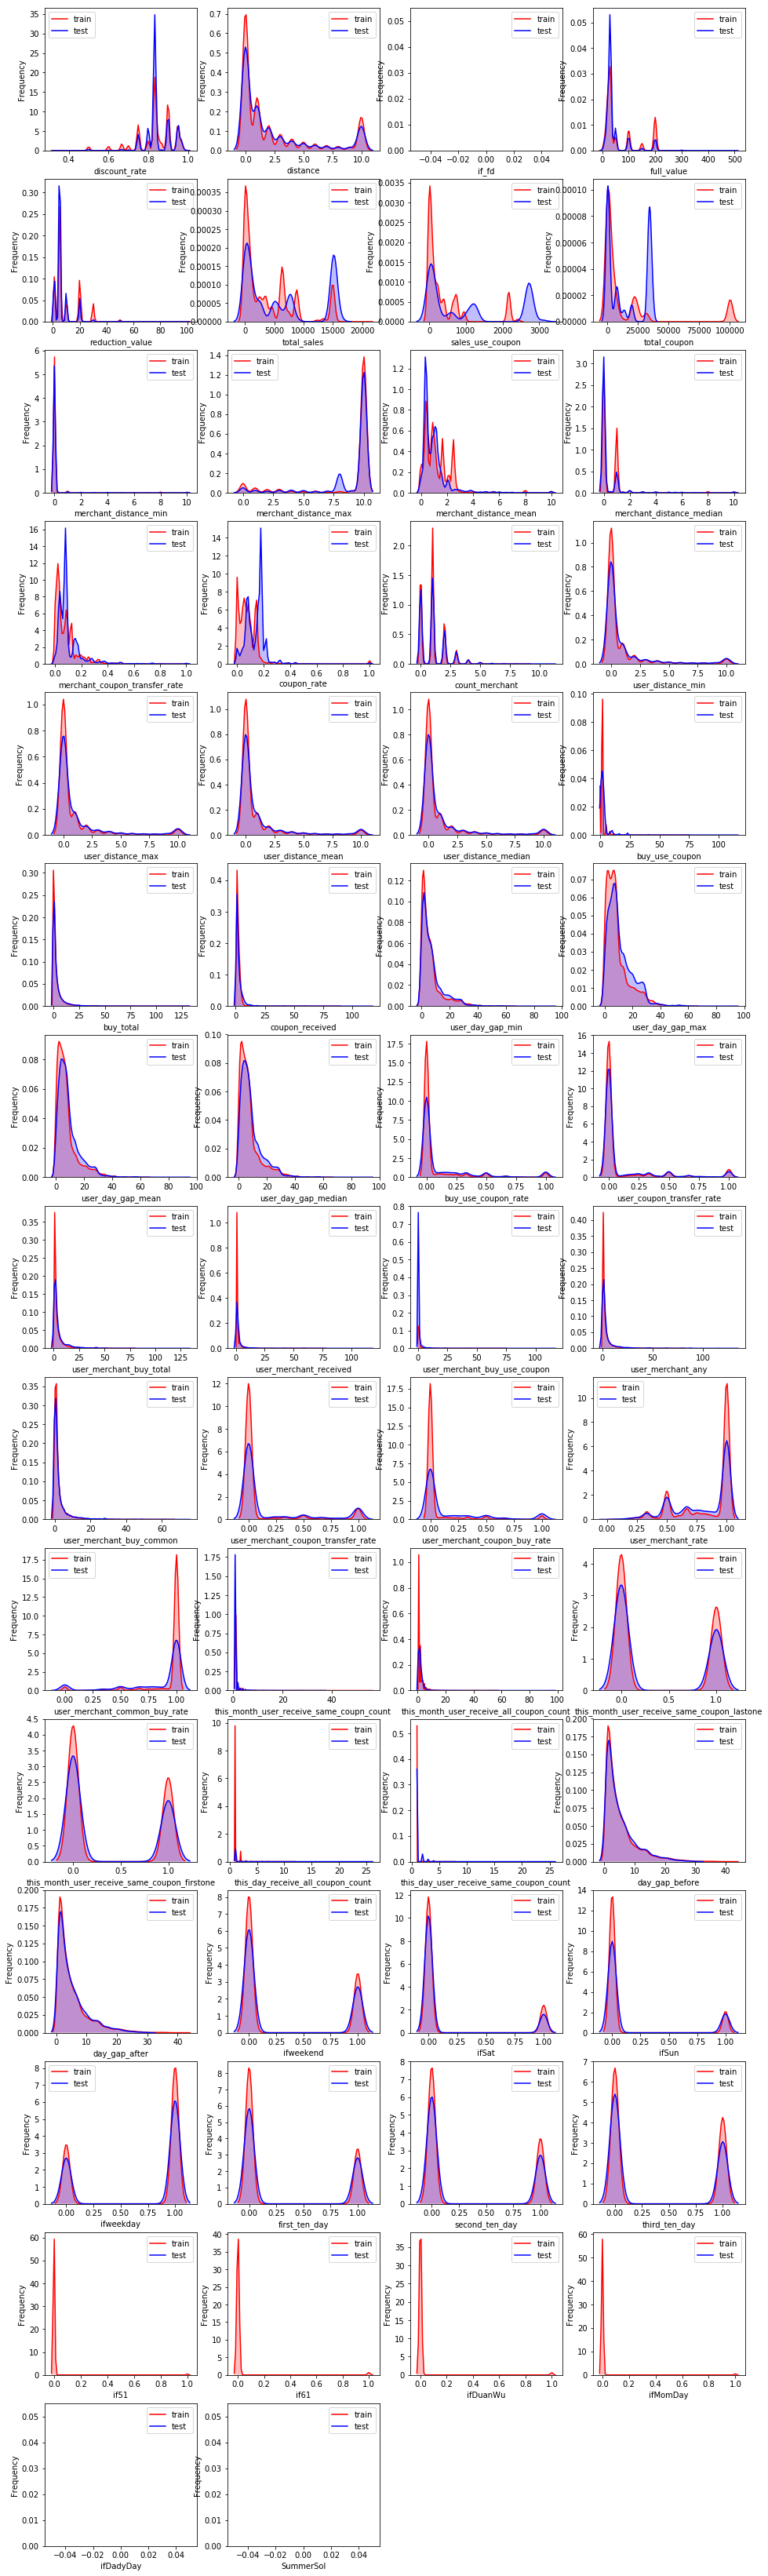

In [34]:
train_X_fd1 = train_X[train_X.if_fd == 1].reset_index(drop=True)
test_X_fd1 = test_X[test_X.if_fd == 1].reset_index(drop=True)
dist_cols = 4
dist_rows = len(test_X_fd1.columns)

plt.figure(figsize=(4 * dist_cols, 4 * dist_rows))

for i, col in enumerate(test_X_fd1.columns):
    ax = plt.subplot(dist_rows, dist_cols, i + 1)
    ax = sns.kdeplot(train_X_fd1[col], color="Red", shade=True)
    ax = sns.kdeplot(test_X_fd1[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])

plt.show()

'sales_use_coupon', 'total_coupon', 'merchant_distance_median', 'buy_use_coupon_rate', 'user_merchant_coupon_transfer_rate'特征在训练集和测试集之间相差比较大，之外，其他的训练集和测试集分布相差不是很大。不过因为这是生成的特征，在训练集和测试集之间可能因为不同时间的商家、用户占比不同，所以造成特征分布不同。不能因为分布不同就直接删除。要在后续通过模型来选择

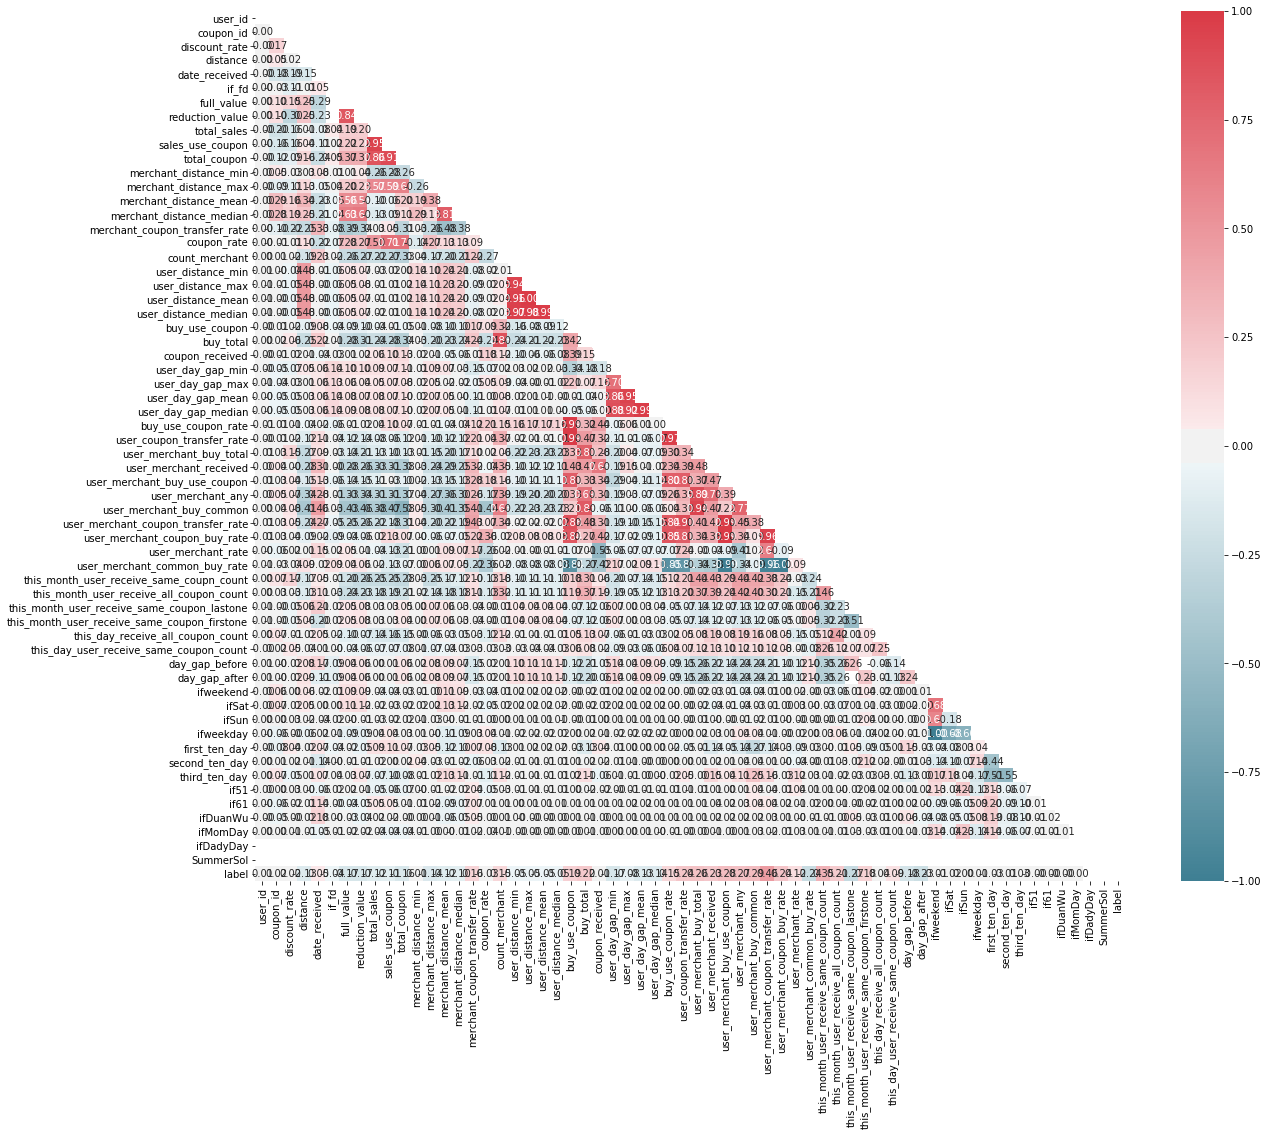

In [35]:
# 特征相关性
plt.figure(figsize=(20, 16))
column = traindf.columns.tolist()
mcorr = traindf[column].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr,
                mask=mask,
                cmap=cmap,
                square=True,
                annot=True,
                fmt='0.2f')
plt.show()

In [36]:
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['label'] > 0.1]['label']
print(numerical_corr.sort_values(ascending=False))

label                                       1.000000
user_merchant_coupon_transfer_rate          0.463061
this_month_user_receive_same_coupn_count    0.350032
user_merchant_buy_common                    0.291294
user_merchant_buy_use_coupon                0.284514
                                              ...   
merchant_distance_mean                      0.124844
total_sales                                 0.123848
user_merchant_rate                          0.115683
sales_use_coupon                            0.105969
merchant_distance_median                    0.102099
Name: label, Length: 34, dtype: float64


可以发现几个穿越特征都排在了前面，因为它们都是在已经发生的“事实”基础上统计的，所以相关性一半会比正常的特征强。在正常的特征中，客户与某个商家之间的交互特征因为指向性很强，所以也都排在前面。

对于决策树和随机森林以及XGboost算法而言，特征缩放对于它们没有什么影响，而后续主要是用LGB，XGB等算法。

In [79]:
#特征后续处理函数，可选方法
#选择是否缩放生成新的特征。
def optimize_feature(old_feature, new_feature):
    from sklearn import preprocessing
    train_data = pd.read_csv(featurepath + 'train_' + old_feature + '.csv',
                             sep=',',
                             encoding="utf-8").fillna(0)
    test_data = pd.read_csv(featurepath + 'test_' + old_feature + '.csv',
                            sep=',',
                            encoding="utf-8").fillna(0)
    id_target_cols = ['user_id', 'coupon_id', 'date_received', 'label']

    #归一化
    features_columns = [
        f for f in test_data.columns if f not in id_target_cols
    ]

    min_max_scaler = preprocessing.MinMaxScaler()

    min_max_scaler = min_max_scaler.fit(train_data[features_columns])

    train_data_scaler = min_max_scaler.transform(train_data[features_columns])
    test_data_scaler = min_max_scaler.transform(test_data[features_columns])

    train_data_scaler = pd.DataFrame(train_data_scaler)
    train_data_scaler.columns = features_columns

    test_data_scaler = pd.DataFrame(test_data_scaler)
    test_data_scaler.columns = features_columns

    # 可以增加其他处理内容

    train_data_scaler['label'] = train_data['label']
    train_data_scaler.to_csv(featurepath + 'train_s' + new_feature + '.csv',
                             index=False,
                             sep=',')
    test_data_scaler.to_csv(featurepath + 'test_s' + new_feature + '.csv',
                            index=False,
                            sep=',')


# #生成新版特征sf4
# optimize_feature('sf3', 'sf4')

## 模型训练

In [37]:
from sklearn import metrics  
import numpy as np  
import pandas as pd
import datetime
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
#########部分SKLearn 集成的算法###############
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB 
#########SKLearn 集成的算法###############
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline
############全局参数#################################
id_col_names=['user_id','coupon_id','date_received']
target_col_name='label'
id_target_cols=['user_id','coupon_id','date_received','label']
myeval='roc_auc'
#cvscore=0
############目录定义#################################
datapath = './data/' 
featurepath = './feature/' 
resultpath = './result/'
tmppath = './tmp/'
scorepath = './score/'

In [38]:
###########工具函数#############################################
#返回ID列
def get_id_df(df):
    return df[id_col_names]


#返回Target列
def get_target_df(df):
    return df[target_col_name]


#返回特征列
def get_predictors_df(df):
    predictors = [f for f in df.columns if f not in id_target_cols]
    return df[predictors]


#按特征名读取训练集
def read_featurefile_train(featurename):
    df = pd.read_csv(featurepath + 'train_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    df.fillna(0, inplace=True)
    return df


#按特征名读取测试集
def read_featurefile_test(featurename):
    df = pd.read_csv(featurepath + 'test_' + featurename + '.csv',
                     sep=',',
                     encoding="utf-8")
    df.fillna(0, inplace=True)
    return df


# 将特征归一化
def standize_df(train_data, test_data):
    from sklearn import preprocessing

    features_columns = [
        f for f in test_data.columns if f not in id_target_cols
    ]
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler = min_max_scaler.fit(train_data[features_columns])

    train_data_scaler = min_max_scaler.transform(train_data[features_columns])
    test_data_scaler = min_max_scaler.transform(test_data[features_columns])

    train_data_scaler = pd.DataFrame(train_data_scaler)
    train_data_scaler.columns = features_columns

    test_data_scaler = pd.DataFrame(test_data_scaler)
    test_data_scaler.columns = features_columns

    train_data_scaler['label'] = train_data['label']
    train_data_scaler[id_col_names] = train_data[id_col_names]
    test_data_scaler[id_col_names] = test_data[id_col_names]
    return train_data_scaler, test_data_scaler


#按特征名读取数据
def read_data(featurename):
    traindf = read_featurefile_train(featurename)
    testdf = read_featurefile_test(featurename)
    #return traindf,testdf
    return standize_df(traindf, testdf)

In [39]:
#数据读取
train_f1, test_f1 = read_data('f1')
train_f2, test_f2 = read_data('sf2')
train_f3, test_f3 = read_data('sf3')

In [40]:
#性能评价函数
#本赛题目标是预测投放的优惠券是否核销。
#针对此任务及一些相关背景知识，使用优惠券核销预测的平均AUC（ROC曲线下面积）作为评价标准。
#即对每个优惠券coupon_id单独计算核销预测的AUC值，再对所有优惠券的AUC值求平均作为最终的评价标准。
# coupon平均auc计算
from sklearn.metrics import roc_auc_score


def myauc(test):
    testgroup = test.groupby(['coupon_id'])
    aucs = []
    for i in testgroup:
        coupon_df = i[1]
        # 测算AUC必须大于1个类别
        if len(coupon_df['label'].unique()) < 2:
            continue
        auc = metrics.roc_auc_score(coupon_df['label'], coupon_df['pred'])
        aucs.append(auc)
    return np.average(aucs)

预测方式，因为要的结果是购买的几率，所以不能直接用Predict因为这样会直接返回0,1,而要用predict_proba

In [41]:
def get_sklearn_model(model_name, param=None):
    #朴素贝叶斯
    if model_name == 'NB':
        model = MultinomialNB(alpha=0.01)
    #逻辑回归
    elif model_name == 'LR':
        model = LogisticRegression(penalty='l2')
    # KNN
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    #随机森林
    elif model_name == 'RF':
        model = RandomForestClassifier()
    #决策树
    elif model_name == 'DT':
        model = tree.DecisionTreeClassifier()
    #向量机
    elif model_name == 'SVC':
        model = SVC(kernel='rbf')
    #GBDT
    elif model_name == 'GBDT':
        model = GradientBoostingClassifier()
    #XGBoost
    elif model_name == 'XGB':
        model = XGBClassifier()
    #lightGBM
    elif model_name == 'LGB':
        model = LGBMClassifier()
    else:
        print("wrong model name!")
        return
    if param is not None:
        model.set_params(**param)
    return model


#对算法进行分析
def classifier_df_score(train_feat, classifier, cvnum, param=None):
    clf = get_sklearn_model(classifier, param)
    train = train_feat.copy()
    target = get_target_df(train_feat).copy()
    kf = StratifiedKFold(n_splits=cvnum)

    scores = []
    score_coupons = []
    for k, (train_index, test_index) in enumerate(kf.split(train, target)):
        train_data, test_data, train_target, test_target = train.iloc[
            train_index], train.iloc[test_index], target[train_index], target[
                test_index]
        clf.fit(get_predictors_df(train_data), train_target)
        train_pred = clf.predict_proba(get_predictors_df(train_data))[:, 1]
        test_pred = clf.predict_proba(get_predictors_df(test_data))[:, 1]

        score_test = roc_auc_score(test_target, test_pred)
        test_data['pred'] = test_pred
        score_coupon_test = myauc(test_data)

        scores.append(score_test)
        score_coupons.append(score_coupon_test)

    print(classifier + "总体AUC:", scores)
    print(classifier + "Coupon AUC:", score_coupons)

In [42]:
print('特征f1, 不同模型5折训练Score：')
classifier_df_score(train_f1, 'NB', 5)
classifier_df_score(train_f1, 'LR', 5)
classifier_df_score(train_f1, 'RF', 5)
classifier_df_score(train_f1, 'LGB', 5)

特征f1, 不同模型5折训练Score：
NB总体AUC: [0.6262323952309308, 0.6309968730536326, 0.6329176972737722, 0.6256234129221081, 0.6374412244488397]
NBCoupon AUC: [0.5249147725232123, 0.516317497959652, 0.5168927693997618, 0.5283106702554456, 0.533635579339208]
LR总体AUC: [0.6751655047880433, 0.674691474923307, 0.681626627026316, 0.6749049286501178, 0.6836584247725953]
LRCoupon AUC: [0.516207359705093, 0.5068162676766141, 0.5096166975268216, 0.5239100110879735, 0.5299051164417051]
RF总体AUC: [0.7017459311013582, 0.7039107876745276, 0.7071976817103538, 0.7025628038887386, 0.7035650037794733]
RFCoupon AUC: [0.5306035111777397, 0.529804064033485, 0.5308539221895882, 0.5416055249680058, 0.525543031622754]
LGB总体AUC: [0.7113309932848492, 0.7134747707224963, 0.7163085820754831, 0.711515041845877, 0.713716981887545]
LGBCoupon AUC: [0.5329343450252698, 0.5302304716687549, 0.5295028988799132, 0.5437068979571419, 0.5305662846954923]


In [43]:
print('特征f2, 不同模型5折训练Score：')
classifier_df_score(train_f2, 'NB', 5)
classifier_df_score(train_f2, 'LR', 5)
classifier_df_score(train_f2, 'RF', 5)
classifier_df_score(train_f2, 'LGB', 5)

特征f2, 不同模型5折训练Score：
NB总体AUC: [0.818137670158786, 0.8047851875519799, 0.7489598414896024, 0.7364815176484398, 0.7406467254078717]
NBCoupon AUC: [0.6390873574295773, 0.6222277265460255, 0.6114559612394324, 0.6080821748375614, 0.6066705651121733]
LR总体AUC: [0.8353721282095271, 0.8340068752502747, 0.7886442708311514, 0.776805029549813, 0.7798178830079339]
LRCoupon AUC: [0.637598479612435, 0.6282484982644028, 0.6018497641294438, 0.5984478173858729, 0.5969309253976595]
RF总体AUC: [0.8156807177702253, 0.8142021725810059, 0.7879416317537957, 0.7847238496071942, 0.7935651473706211]
RFCoupon AUC: [0.5955838123352261, 0.5554408852859062, 0.5405097893208544, 0.5614151545726622, 0.5701739802245369]
LGB总体AUC: [0.875738445408883, 0.8754361533720636, 0.8483304474233044, 0.8423550884180224, 0.8439283411929649]
LGBCoupon AUC: [0.6355622186088957, 0.6029903362842629, 0.6045049930612003, 0.6103159507969134, 0.6061803616366903]


In [44]:
print('特征f3, 不同模型5折训练Score：')
classifier_df_score(train_f3, 'NB', 5)
classifier_df_score(train_f3, 'LR', 5)
classifier_df_score(train_f3, 'RF', 5)
classifier_df_score(train_f3, 'LGB', 5)

特征f3, 不同模型5折训练Score：
NB总体AUC: [0.8493906353176273, 0.8384492063933501, 0.7922965892941114, 0.7809232805844379, 0.7837201190037197]
NBCoupon AUC: [0.7132216264896989, 0.7070784754581539, 0.7120636283274985, 0.7089033823480863, 0.6991847338138065]
LR总体AUC: [0.8623103333471793, 0.8671037075354944, 0.8312205530926585, 0.8199149531120281, 0.8203581739512165]
LRCoupon AUC: [0.7206958746833496, 0.7346083994645304, 0.7254738495615596, 0.7425911852597369, 0.7253311133172068]
RF总体AUC: [0.8672897124111075, 0.8689370058026324, 0.8527298419312132, 0.8497037064909825, 0.8515080386357108]
RFCoupon AUC: [0.7206128797798346, 0.6954015814031306, 0.7105904139045163, 0.728049844189661, 0.7254957013205001]
LGB总体AUC: [0.9029292573547674, 0.9054257455309609, 0.8867846124799128, 0.8822325605317237, 0.8824878234349243]
LGBCoupon AUC: [0.7464717721514746, 0.7427340568914499, 0.7539398132669305, 0.7676204913522974, 0.7587210385565417]


通过对比训练集上不同算法的运算结果可以发现，F1特征集因为特征比较少，有严重的欠拟合，所以所有算法的分数都比较低。 F2特征集通过滑窗增加统计特征，它的分数比f1有了飞跃性的提高，其实在现实的业务场景F2+LR已经是一个很常用的解决方案了。之所以在实际作业中更倾向逻辑回归而不是类似LightGBM的算法，是为了减少计算量。当然如果计算资源不是问题的话，LightGBM也是一个好选择

### 绘图分析拟合情况

In [ ]:
#画学习曲线
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=[0.01, 0.02, 0.05, 0.1, 0.2, 0.3]):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        scoring=myeval,
        n_jobs=n_jobs,
        train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt


#画算法的学习曲线,为加快画图速度，最多选20%数据
def plot_curve_single(traindf,
                      classifier,
                      cvnum,
                      train_sizes=[0.01, 0.02, 0.05, 0.1, 0.2, 0.3]):
    X = get_predictors_df(traindf)
    y = get_target_df(traindf)
    title = "learning curve of " + classifier + ", cv:" + str(cvnum)
    estimator = get_sklearn_model(classifier)  #建模
    plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=(0, 1.01),
                        cv=cvnum,
                        train_sizes=train_sizes)

### LGB调参简单版
可以使用在天猫重复购买中使用的贝叶斯超参数搜索工具，此处就学习一下赛题思路，不搞复杂了

LightGBM 调参次序：
第一步：学习率和迭代次数
第二步：确定max_depth和num_leaves
第三步：确定min_data_in_leaf和max_bin in
第四步：确定feature_fraction、bagging_fraction、bagging_freq
第五步：确定lambda_l1和lambda_l2
第六步：确定 min_split_gain 
第七步：降低学习率，增加迭代次数，验证模型

In [ ]:
#f3特征
traindf = train_f3.copy()

#按日期分割，为了加快速度，只用了一般数据进行网格调参，正式的时候应该全用
train = traindf[traindf.date_received < 20160515]
test = traindf[traindf.date_received >= 20160515]

train_data = get_predictors_df(train).copy()
train_target = get_target_df(train).copy()
test_data = get_predictors_df(test).copy()
test_target = get_target_df(test).copy()

traindf.head()

In [ ]:
#第一步：学习率和迭代次数
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# 切分数据 训练数据80% 验证数据20%
# 为了加快速度CV选的3，其实一般用5
# 因为每训练一次耗时很多，所以每个参数的选项不多，间隔比较大，正式的时候应该是比较多，间隔比较细的
# 本次只是演示，所以如果最好参数位于区间的边缘也就直接用了，其实如果最好参数在边缘，需要重新再搜索
# 就根据上一次结果，缩小超参数范围
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       learning_rate=0.1,
                       max_depth=5,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)
parameters = {'n_estimators': [100, 150, 175, 200, 225, 250]}

clf = GridSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)
score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第二步：确定max_depth和num_leaves
#n_estimators=200
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)
parameters = {'max_depth': range(4, 8, 1), 'num_leaves': range(10, 150, 10)}
#parameters={'max_depth': range(4,8,2), 'num_leaves':range(10, 100, 20)}
clf = GridSearchCV(model, parameters, cv=3, verbose=2)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第三步：确定min_data_in_leaf和max_bin in
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)

#parameters={'max_bin': range(100,500,50),'min_data_in_leaf':range(100,150,10)}
parameters = {
    'max_bin': range(100, 500, 100),
    'min_data_in_leaf': range(100, 150, 50)
}
#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第四步：确定feature_fraction、bagging_fraction、bagging_freq
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       bagging_fraction=0.8,
                       feature_fraction=0.8)

parameters = {
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_freq': range(0, 10, 2)
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第五步：确定lambda_l1和lambda_l2
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

parameters = {
    'lambda_l1': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'lambda_l2': [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
#第六步：确定 min_split_gain
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
#{'lambda_l1': 1e-05, 'lambda_l2': 1e-05}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

parameters = {
    'min_split_gain': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

#调高 verbose可以看到更多信息
clf = GridSearchCV(model, parameters, cv=3, verbose=3)
clf.fit(train_data, train_target)

score_test = roc_auc_score(test_target, clf.predict_proba(test_data)[:, 1])

print("LightGBM GridSearchCV AUC Score:   ", score_test)
print("最优参数:")
print(clf.best_params_)

In [ ]:
# 第七步：降低学习率，增加迭代次数，验证模型
#已经确认内容：
#n_estimators=200
#{'max_depth': 6, 'num_leaves': 40}
#{'max_bin': 400, 'min_data_in_leaf': 120}
#{'bagging_fraction': 0.9, 'bagging_freq': 4, 'feature_fraction': 0.6}
#{'lambda_l1': 1e-05, 'lambda_l2': 1e-05}
#{'min_split_gain': 0.0}
model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.1,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.1 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.05,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.05 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.01,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.01 AUC Score:   ", score_test)

model = LGBMClassifier(boosting_type='gbdt',
                       objective='binary',
                       metrics='auc',
                       n_estimators=200,
                       max_depth=6,
                       num_leaves=40,
                       max_bin=400,
                       min_data_in_leaf=120,
                       learning_rate=0.005,
                       lambda_l1=1e-05,
                       lambda_l2=1e-05,
                       min_split_gain=0.0,
                       bagging_freq=4,
                       bagging_fraction=0.9,
                       feature_fraction=0.6)

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("LightGBM learning rate 0.005 AUC Score:   ", score_test)

In [ ]:
model = LGBMClassifier()

model.fit(train_data, train_target)
score_test = roc_auc_score(test_target, model.predict_proba(test_data)[:, 1])

print("默认参数 AUC Score:   ", score_test)

In [ ]:
#f3特征
train = train_f3.copy()
train.head()
print('默认参数')
classifier_df_score(train, 'LGB', 5)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'eval_metric': 'auc',
    'n_estimators': 200,
    'max_depth': 5,
    'num_leaves': 40,
    'max_bin': 400,
    'min_data_in_leaf': 120,
    'learning_rate': 0.1,
    'lambda_l1': 1e-05,
    'lambda_l2': 1e-05,
    'min_split_gain': 0.0,
    'bagging_freq': 4,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.6,
    'seed': 1024,
    'n_thread': 12
}
print('调参后')
classifier_df_score(train, 'LGB', 5, params)

In [ ]:
# 可以绘图查看超参数对训练的影响
#对进行网格调参
def grid_plot(train_feat,
              classifier,
              cvnum,
              param_range,
              param_name,
              param=None):
    from sklearn.model_selection import validation_curve
    train_scores, test_scores = validation_curve(get_sklearn_model(
        classifier, param),
                                                 get_predictors_df(train_feat),
                                                 get_target_df(train_feat),
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cvnum,
                                                 scoring='roc_auc',
                                                 n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with " + param_name)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.semilogx(param_range,
                 train_scores_mean,
                 label="Training score",
                 color="r")
    plt.fill_between(param_range,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.2,
                     color="r")
    plt.semilogx(param_range,
                 test_scores_mean,
                 label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2,
                     color="g")
    plt.legend(loc="best")
    plt.show()

### 训练预测

In [48]:
pred_result_col = 'pred'

#预测方式：按照购买概率进行预测
def proba_predict(model, df):
    pred = model.predict_proba(df)
    return pred[:, 1]


#预测
def classifier_pred(traindf, classifier, param=None):
    model = get_sklearn_model(classifier, param)
    if classifier in ['LGB']:
        model.fit(get_predictors_df(traindf),
                  get_target_df(traindf),
                  eval_metric=myeval)
    if classifier in ['XGB']:
        model.fit(get_predictors_df(traindf),
                  get_target_df(traindf),
                  eval_metric='auc')
    else:
        model.fit(get_predictors_df(traindf), get_target_df(traindf))
    return model


# 不分折进行预测
def fit_once(train_feat, test_feat, classifier, param=None):
    model = classifier_pred(train_feat, classifier, param)
    predicted = pd.DataFrame(proba_predict(model,
                                           get_predictors_df(test_feat)))
    return predicted, get_target_df(train_feat)


# 分折进行预测
def fit_cv(train_feat, test_feat, classifier, cvnum, param=None):
    print('开始CV ' + str(cvnum) + '折训练...')
    train_preds = np.zeros(train_feat.shape[0])
    test_preds = np.zeros((test_feat.shape[0], cvnum))
    i = 0
    kf = StratifiedKFold(n_splits=cvnum, shuffle=True, random_state=520)
    for train_index, test_index in kf.split(get_predictors_df(train_feat),
                                            get_target_df(train_feat)):
        print('第{}次训练...'.format(i + 1))
        train_feat1 = train_feat.iloc[train_index]
        train_feat2 = train_feat.iloc[test_index]
        model = classifier_pred(train_feat1, classifier, param)

        train_preds[test_index] += proba_predict(
            model, get_predictors_df(train_feat2))
        test_preds[:, i] = proba_predict(model, get_predictors_df(test_feat))
        i = i + 1

    test_y = test_preds.mean(axis=1)
    return pd.DataFrame(test_y), pd.DataFrame(train_preds)


def classifier_df(train_feat, test_feat, classifier, cvnum, param=None):
    if cvnum <= 1:
        predicted, train_preds = fit_once(train_feat, test_feat, classifier,
                                          param)
    else:
        predicted, train_preds = fit_cv(train_feat, test_feat, classifier,
                                        cvnum, param)
    print('output')
    #predicted = predicted.round(3)
    return predicted, train_preds


#输出结果
def output_predicted(predicted, resultfile, test_feat):
    predicted = round(predicted, 3)
    resultdf = get_id_df(test_feat).copy()
    resultdf['Probability'] = predicted
    resultdf.to_csv(resultfile, header=False, index=False, sep=',')


#预测函数
def classifier_df_simple(train_feat, test_feat, classifier, param=None):
    model = get_sklearn_model(classifier, param)
    model.fit(get_predictors_df(train_feat), get_target_df(train_feat))
    predicted = pd.DataFrame(
        model.predict_proba(get_predictors_df(test_feat))[:, 1])
    return predicted

In [52]:
def classifier_single(featurename, classifier, cvnum, param=None):
    traindf, testdf = read_data(featurename)

    predicted, train_preds = classifier_df(traindf, testdf, classifier, cvnum,
                                           param)

    if cvnum > 1:
        traindf[pred_result_col] = train_preds
        score = myauc(traindf)
        print('线下成绩：    {}'.format(score))
        resultfile = resultpath + featurename + '_' + str(
            cvnum) + '_' + classifier + '_' + format(
                datetime.datetime.now().strftime('%Y%m%d_%H%M%S')) + '_' + str(
                    round(score, 3)) + '.csv'
    else:
        resultfile = resultpath + featurename + '_' + str(
            cvnum) + '_' + classifier + '_' + format(
                datetime.datetime.now().strftime('%Y%m%d_%H%M%S')) + '.csv'
    output_predicted(predicted, resultfile, testdf)


#按满减情况分别预测
def classifier_single_sep_fd(featurename, classifier, cvnum, param=None):
    trainalldf, testalldf = read_data(featurename)
    test_result = pd.DataFrame()
    train_result = pd.DataFrame()
    #按满减情况分类
    for fd in range(0, 2):
        traindf = trainalldf[trainalldf.if_fd == fd].copy()
        testdf = testalldf[testalldf.if_fd == fd].copy()

        predicted, train_preds = classifier_df(traindf, testdf, classifier,
                                               cvnum, param)
        predicted = round(predicted, 3)

        if fd == 0:
            test_result = get_id_df(testdf).copy().reset_index(drop=True)
            test_result[pred_result_col] = predicted

            train_result = traindf.copy().reset_index(drop=True)
            train_result[pred_result_col] = train_preds

        else:
            dft1 = get_id_df(testdf).copy().reset_index(drop=True)
            dft1[pred_result_col] = predicted
            test_result = pd.concat([test_result, dft1],
                                    axis=0).reset_index(drop=True)

            dfv1 = traindf.copy().reset_index(drop=True)
            dfv1[pred_result_col] = train_preds
            train_result = pd.concat([train_result, dfv1],
                                     axis=0).reset_index(drop=True)

    if cvnum > 1:
        #score = metrics.roc_auc_score(get_target_df(train_result),train_result['predicted'])
        score = round(myauc(train_result), 3)
        print('线下得分：    {}'.format(score))
        resultfile = resultpath + featurename + '_sepfd_' + str(
            cvnum) + '_' + classifier + '_' + str(score) + '.csv'
    else:
        resultfile = resultpath + featurename + '_sepfd_' + str(
            cvnum) + '_' + classifier + '.csv'
    test_result.to_csv(resultfile, header=False, index=False, sep=',')

In [50]:
# 采用f3版本特征，LightGBM，5折，优化后参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'eval_metric': 'auc',
    'n_estimators': 200,
    'max_depth': 5,
    'num_leaves': 40,
    'max_bin': 400,
    'min_data_in_leaf': 120,
    'learning_rate': 0.05,
    'lambda_l1': 1e-05,
    'lambda_l2': 1e-05,
    'min_split_gain': 0.0,
    'bagging_freq': 4,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.6,
    'seed': 1024,
    'n_thread': 12
}
classifier_single('sf3', 'LGB', 5, params)

开始CV 5折训练...
第1次训练...
[LightGBM] [Warning] Unknown parameter: n_thread
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1e-05
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
第2次训练...
[LightGBM] [Warning] Unknown parameter: n_thread
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be 

In [51]:
# 采用f3版本特征，LightGBM，5折，默认参数，根据是否为满减分别训练
classifier_single_sep_fd('sf3', 'LGB', 5)

开始CV 5折训练...
第1次训练...
第2次训练...
第3次训练...
第4次训练...
第5次训练...


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 